In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
import librosa
from scipy.stats import zscore
import seaborn as sns
import IPython.display as ipd
import os
import tqdm 
from tqdm._tqdm_notebook import tqdm_notebook
import soundfile as sf
import csv

In [29]:
df = pd.read_csv('dataset.csv')
df

Age       Location                Audio File  \
0     12-15 years  Uttar Pradesh  ./All/2336/HI_S3_W_2.mp3   
1     12-15 years  Uttar Pradesh  ./All/2336/HI_S3_W_4.mp3   
2     12-15 years  Uttar Pradesh  ./All/2336/HI_S3_W_1.mp3   
3     12-15 years  Uttar Pradesh  ./All/2336/HI_S3_W_3.mp3   
4     12-15 years  Uttar Pradesh  ./All/2336/HI_S3_W_0.mp3   
...           ...            ...                       ...   
6369  10-12 years      Rajasthan  ./All/4113/HI_S1_W_1.mp3   
6370  12-15 years      Rajasthan  ./All/4823/HI_S3_W_0.mp3   
6371  12-15 years      Rajasthan  ./All/4823/HI_S3_W_1.mp3   
6372  12-15 years      Rajasthan  ./All/4823/HI_S3_W_2.mp3   
6373  12-15 years      Rajasthan  ./All/4823/HI_S3_W_4.mp3   

                                Mfcc File Word Annotation  
0     mfcc_files/./All/2336/HI_S3_W_2.csv  sit    Correct  
1     mfcc_files/./All/2336/HI_S3_W_4.csv  fox    Correct  
2     mfcc_files/./All/2336/HI_S3_W_1.csv  old    Correct  
3     mfcc_files/./All/2336/HI_S3_W_3.csv  run    Correct  
4     mfcc_files/./All/2336/HI_S3_W_0.csv  hen    Correct  
...                                   ...  ...        ...  
6369  mfcc_files/./All/4113/HI_S1_W_1.csv  red    Correct  
6370  mfcc_files/./All/4823/HI_S3_W_0.csv  hen    Correct  
6371  mfcc_files/./All/4823/HI_S3_W_1.csv  old    Correct  
6372  mfcc_files/./All/4823/HI_S3_W_2.csv  sit    Correct  
6373  mfcc_files/./All/4823/HI_S3_W_4.csv  fox    Correct  

[6374 rows x 6 columns]

In [30]:
print(df.describe())
print(df.info())

                Age       Location                Audio File  \
count          6374           6374                      6374   
unique            6              3                      6374   
top     10-12 years  Uttar Pradesh  ./All/2336/HI_S3_W_2.mp3   
freq           2430           2483                         1   

                                  Mfcc File  Word Annotation  
count                                  6374  6374       6374  
unique                                 6374    26          1  
top     mfcc_files/./All/2336/HI_S3_W_2.csv   man    Correct  
freq                                      1   531       6374  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6374 entries, 0 to 6373
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         6374 non-null   object
 1   Location    6374 non-null   object
 2   Audio File  6374 non-null   object
 3   Mfcc File   6374 non-null   object
 4   Word        6

Age
10-12 years          2430
12-15 years          2328
7-10 years           1348
5-7 years             208
15-18years             46
less than 5 years      14
Name: count, dtype: int64
Location
Uttar Pradesh    2483
Rajasthan        2440
Maharashtra      1451
Name: count, dtype: int64
Word
man    531
red    443
sun    440
cat    428
fan    426
cow    307
big    287
lip    285
rat    277
old    257
dog    248
run    245
fat    240
boy    237
cup    230
sit    228
hot    210
hen    197
fox    196
pen    188
box    149
new     83
hat     78
wet     69
day     51
out     44
Name: count, dtype: int64


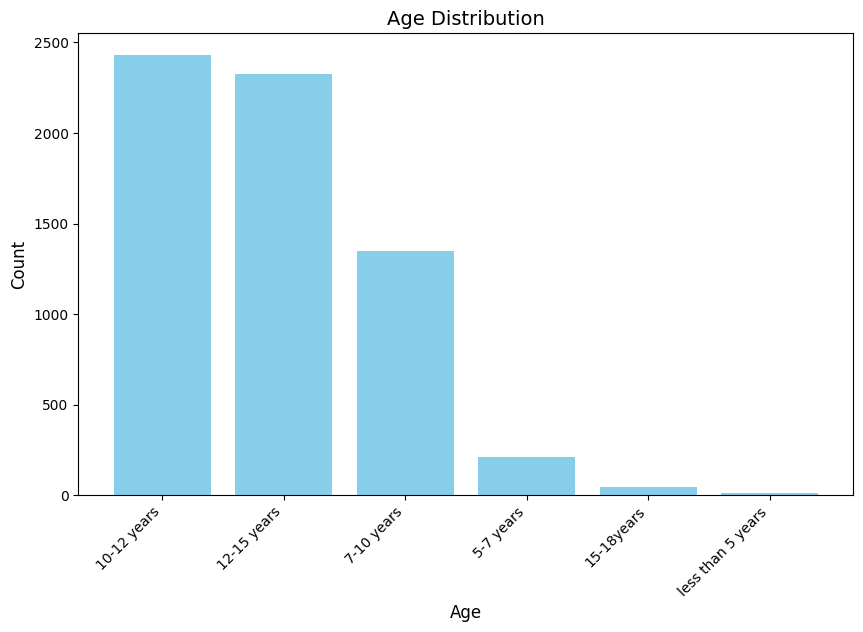

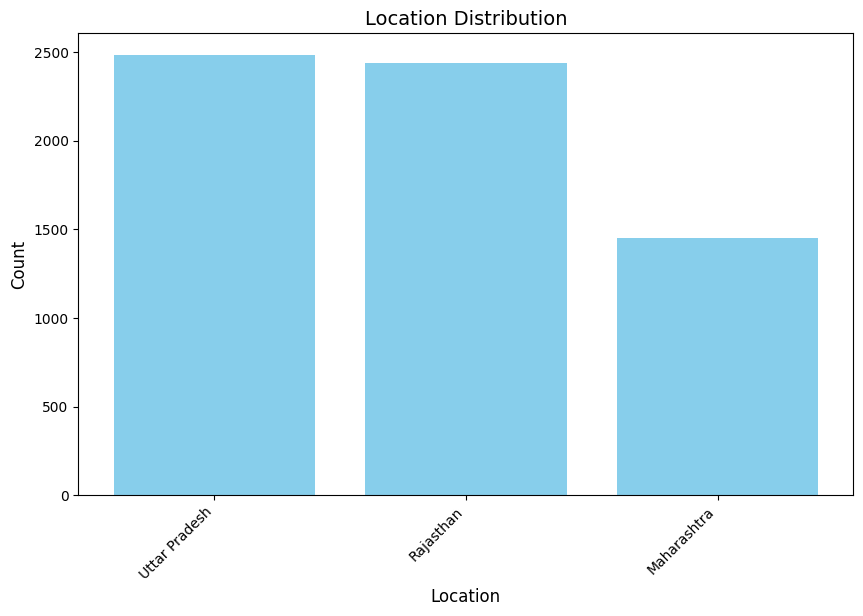

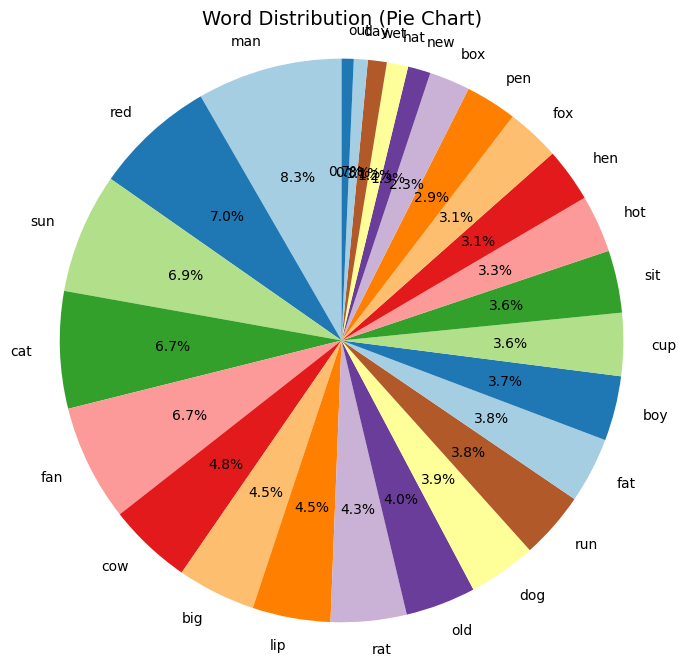

In [31]:
print(df['Age'].value_counts())
print(df['Location'].value_counts())
print(df['Word'].value_counts())

# Function to create and display a bar plot for any column
def plot_bar(column_name, title):
    counts = df[column_name].value_counts()  # Get value counts
    plt.figure(figsize=(10, 6))
    plt.bar(counts.index, counts.values, color='skyblue')
    
    # Adding titles and labels
    plt.title(f'{title} Distribution', fontsize=14)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Rotating x labels if necessary
    plt.xticks(rotation=45, ha='right')
    
    # Display the plot
    plt.show()

# Plot for 'Age'
plot_bar('Age', 'Age')

# Plot for 'Location'
plot_bar('Location', 'Location')


# Function to create and display a pie chart for 'Word'
def plot_pie(column_name, title):
    counts = df[column_name].value_counts()  # Get value counts
    plt.figure(figsize=(8, 8))
    
    # Plotting pie chart
    plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    
    # Equal aspect ratio ensures the pie is drawn as a circle
    plt.title(f'{title} Distribution (Pie Chart)', fontsize=14)
    plt.axis('equal')
    
    # Display the plot
    plt.show()

# Pie chart for 'Word'
plot_pie('Word', 'Word')


Playing Audio for Word: sit


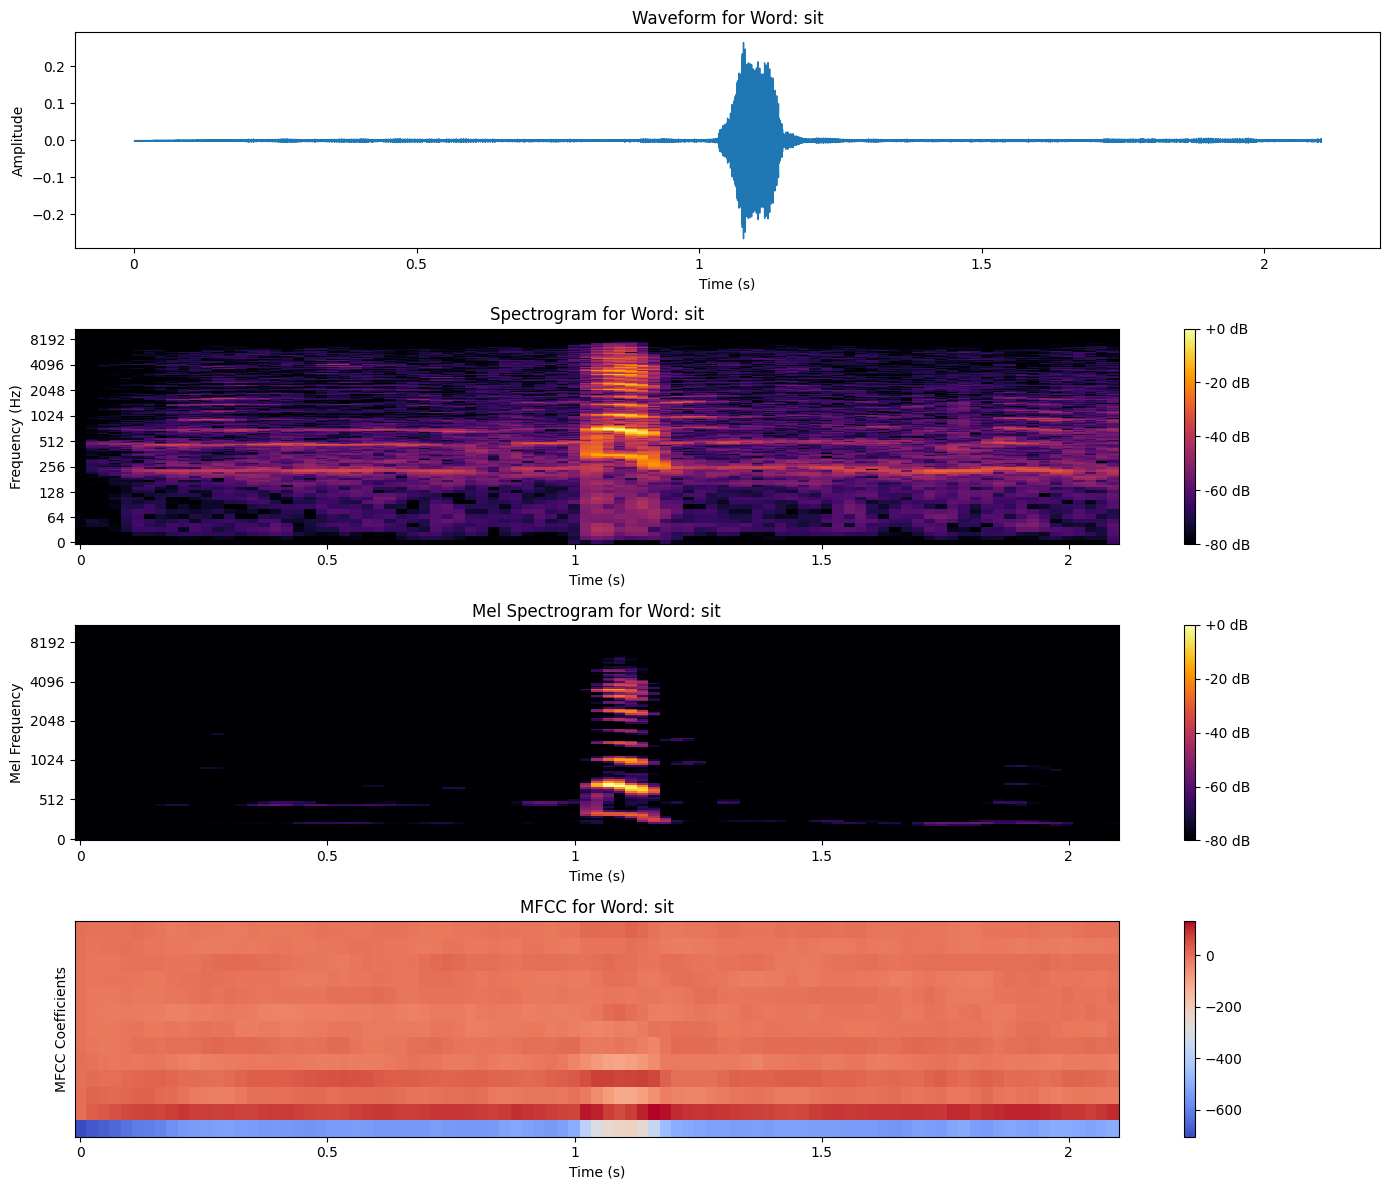

Playing Audio for Word: fox


Exception ignored in: <function tqdm.__del__ at 0x7637a4c81a80>
Traceback (most recent call last):
  File "/usr/lib/python3.12/site-packages/tqdm/std.py", line 1148, in __del__
    self.close()
  File "/usr/lib/python3.12/site-packages/tqdm/notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
    ^^^^^^^^^
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


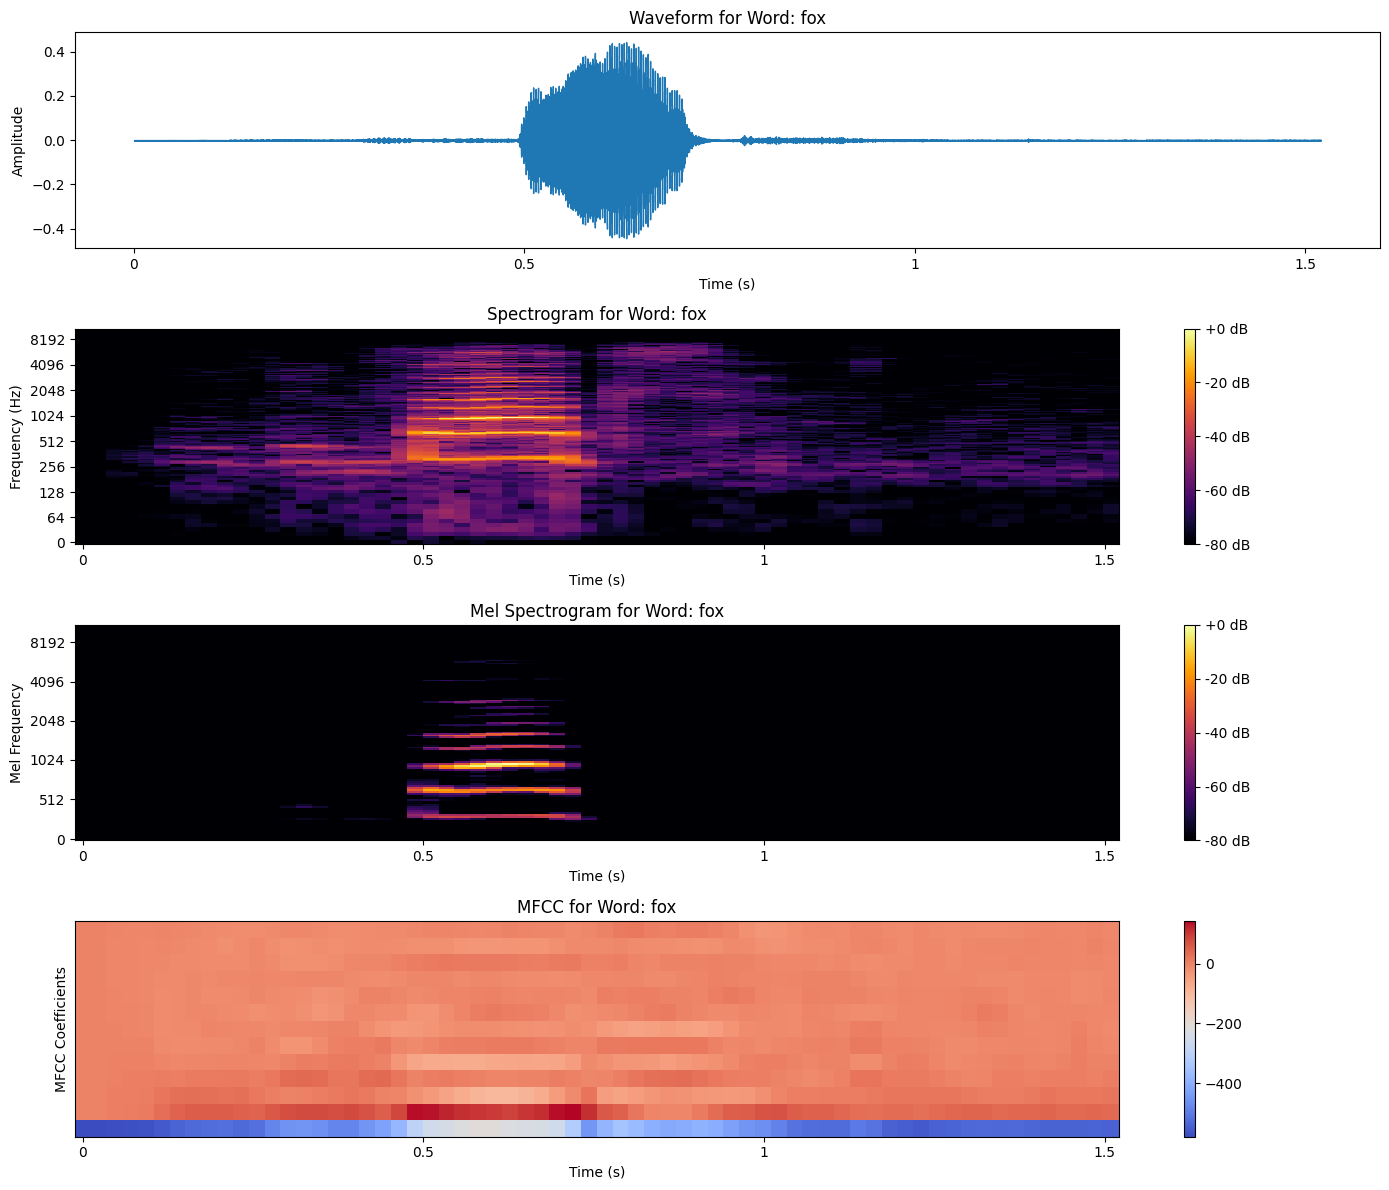

Playing Audio for Word: old


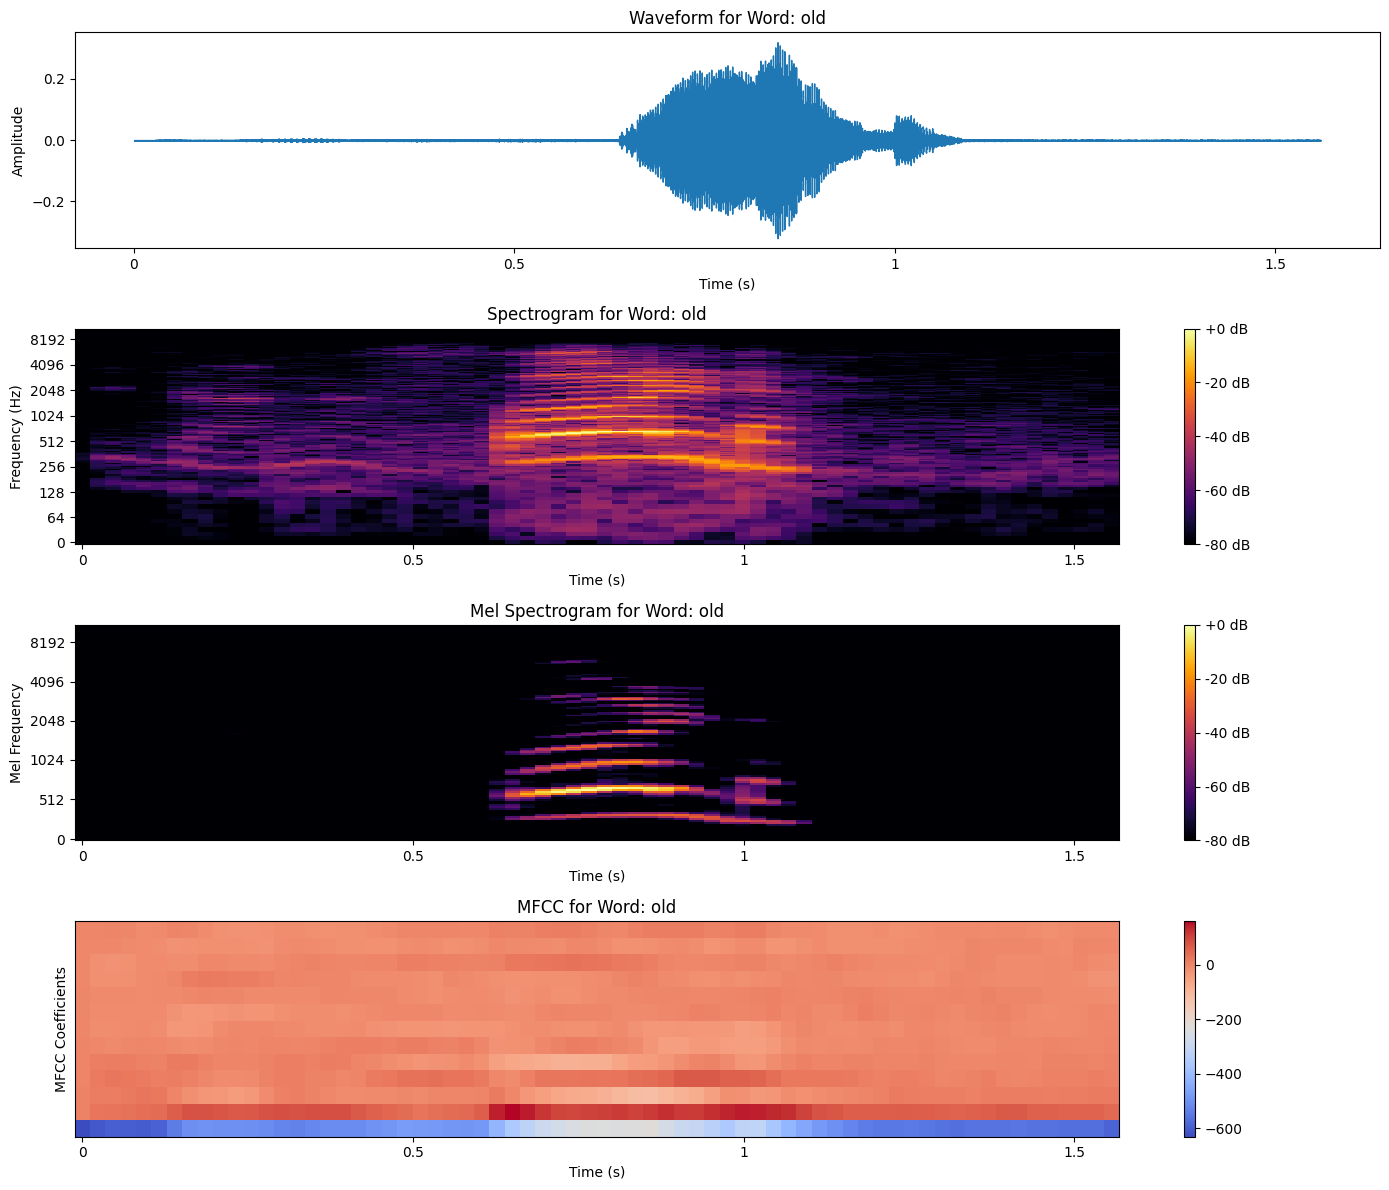

Playing Audio for Word: run


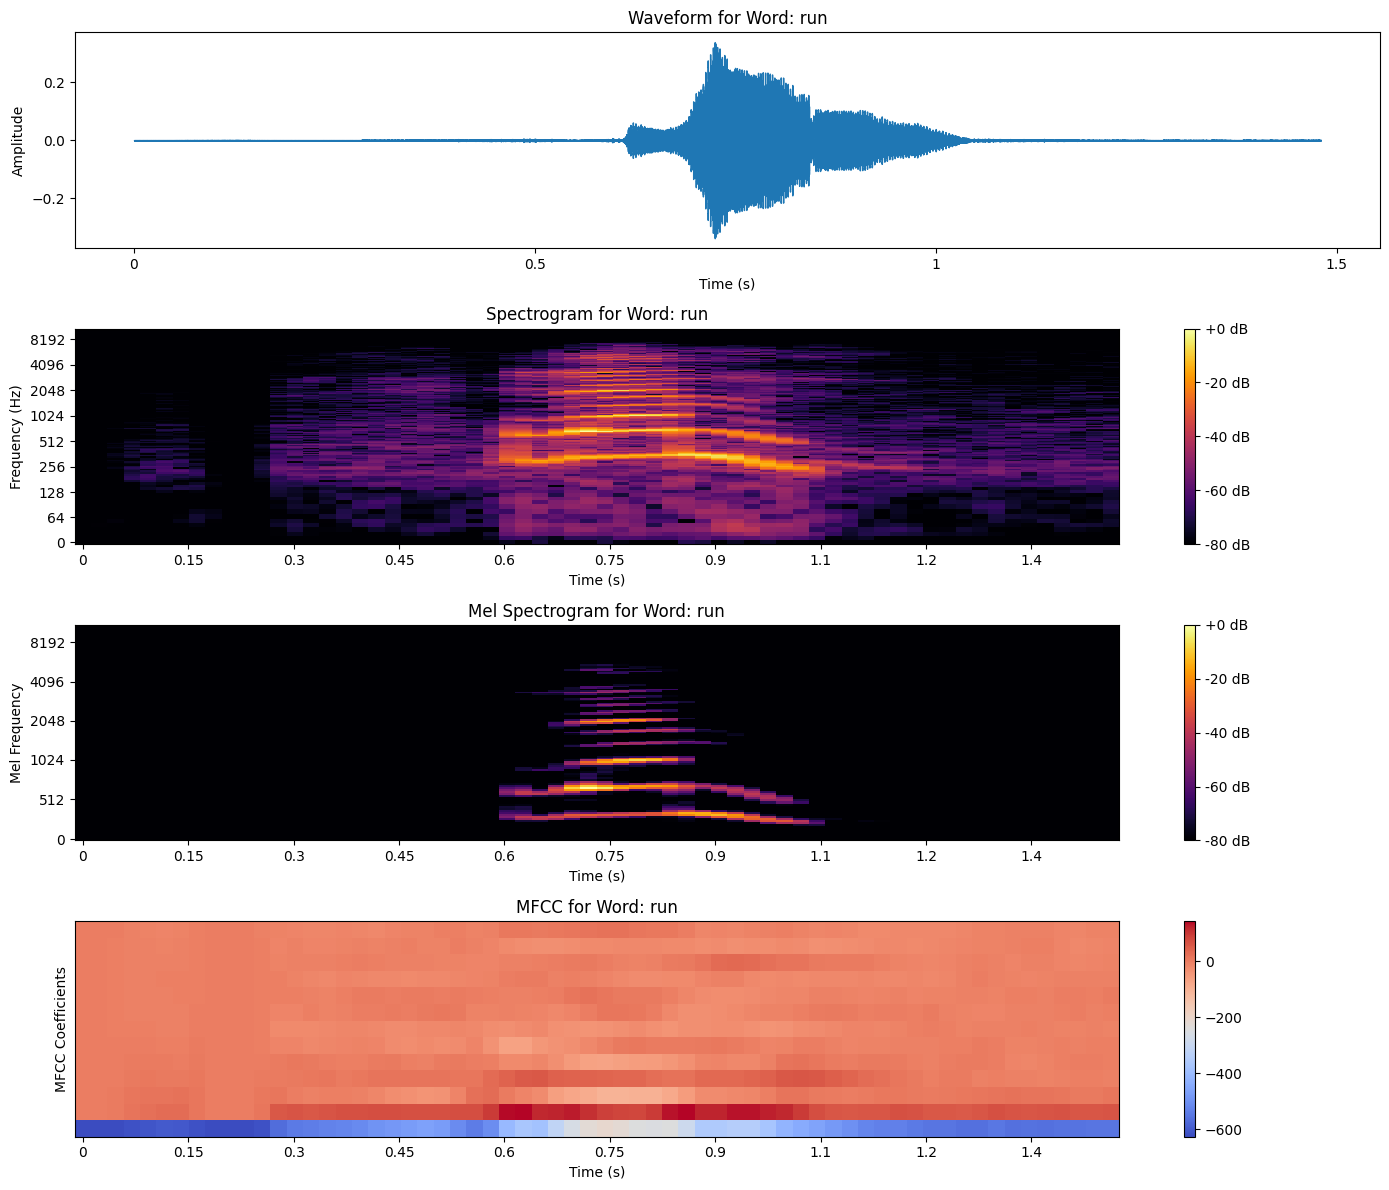

Playing Audio for Word: hen


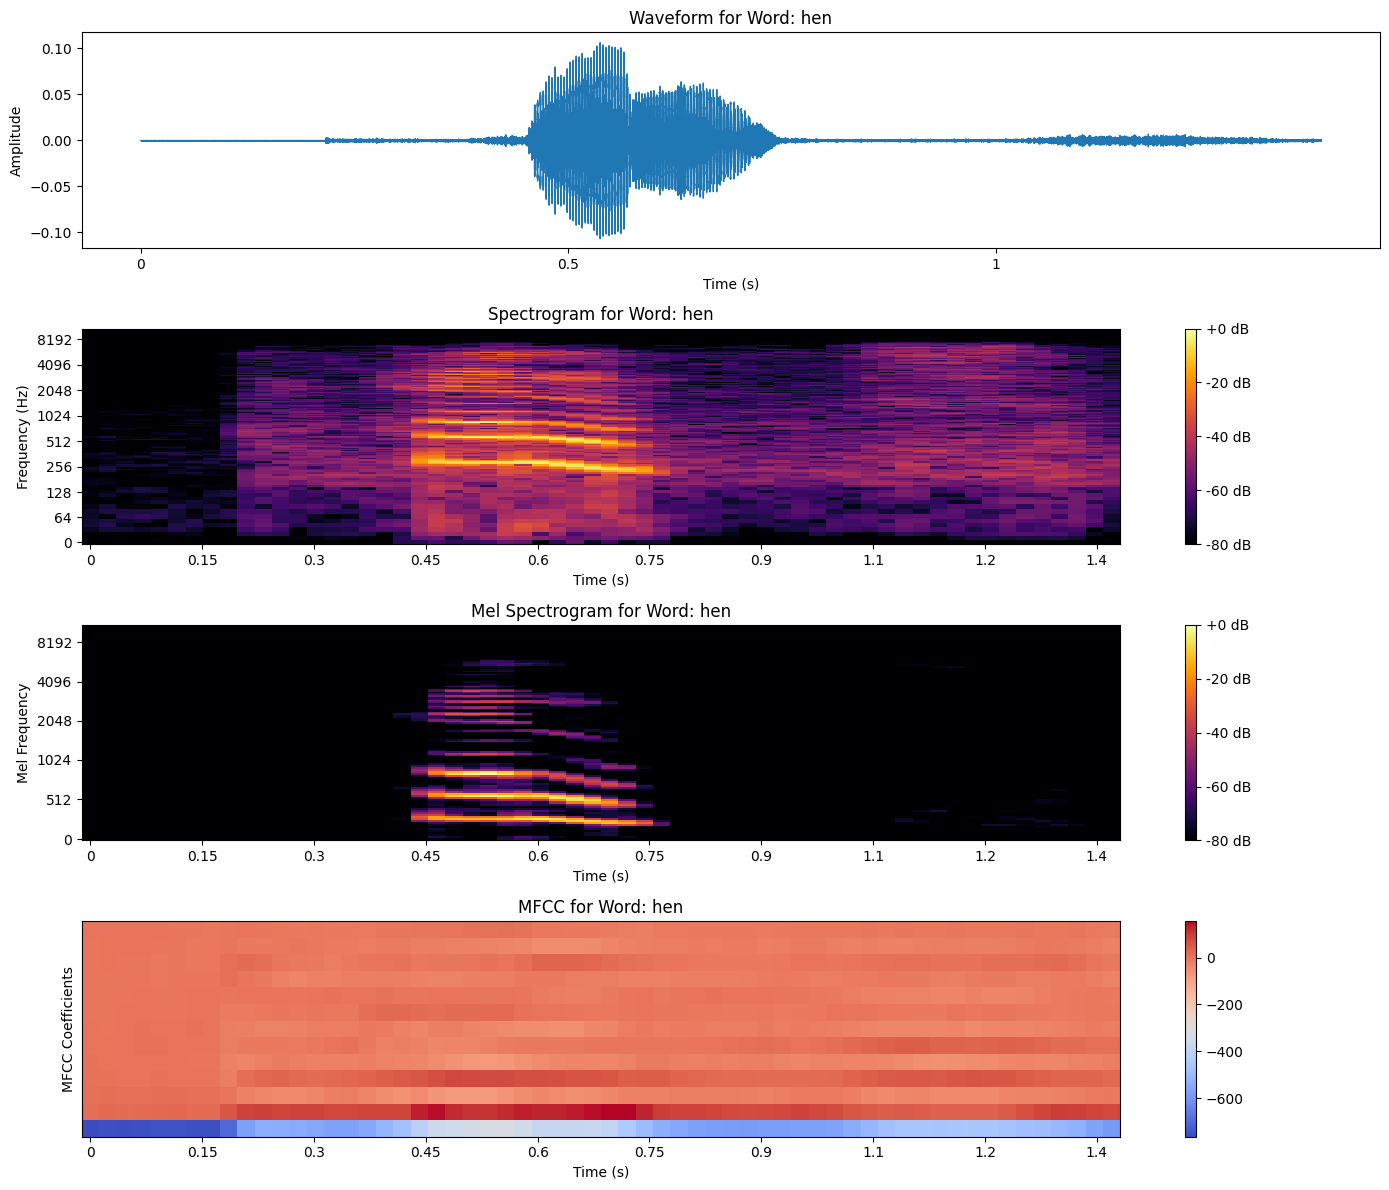

Playing Audio for Word: cat


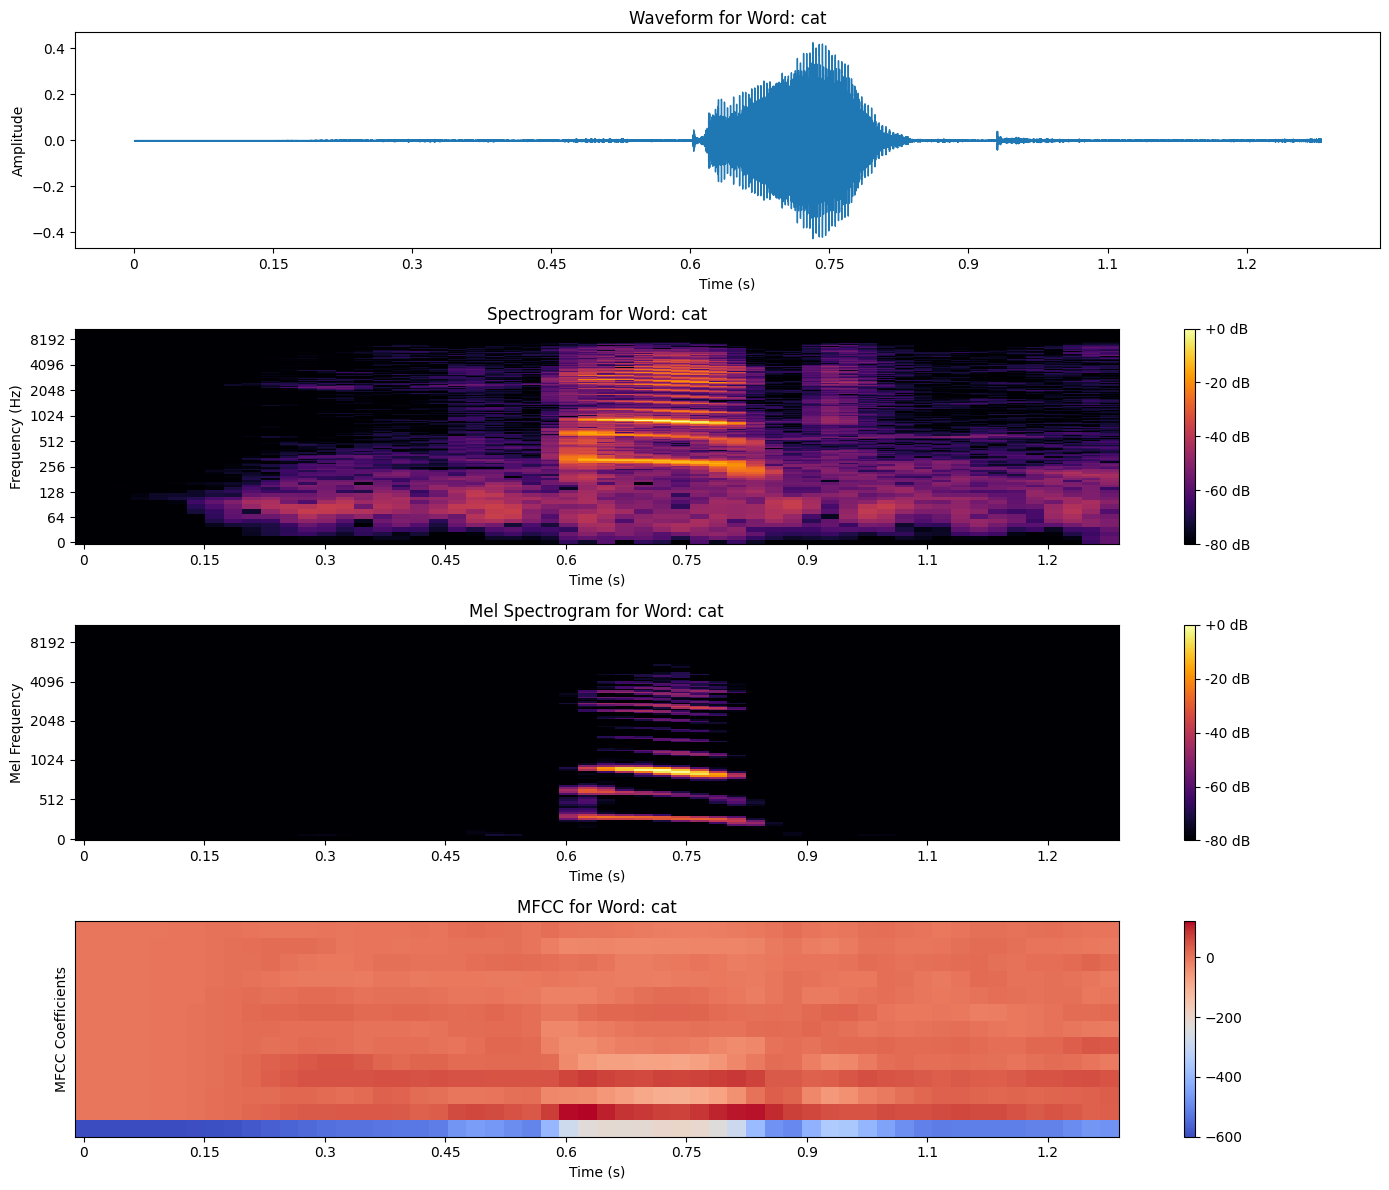

Playing Audio for Word: red


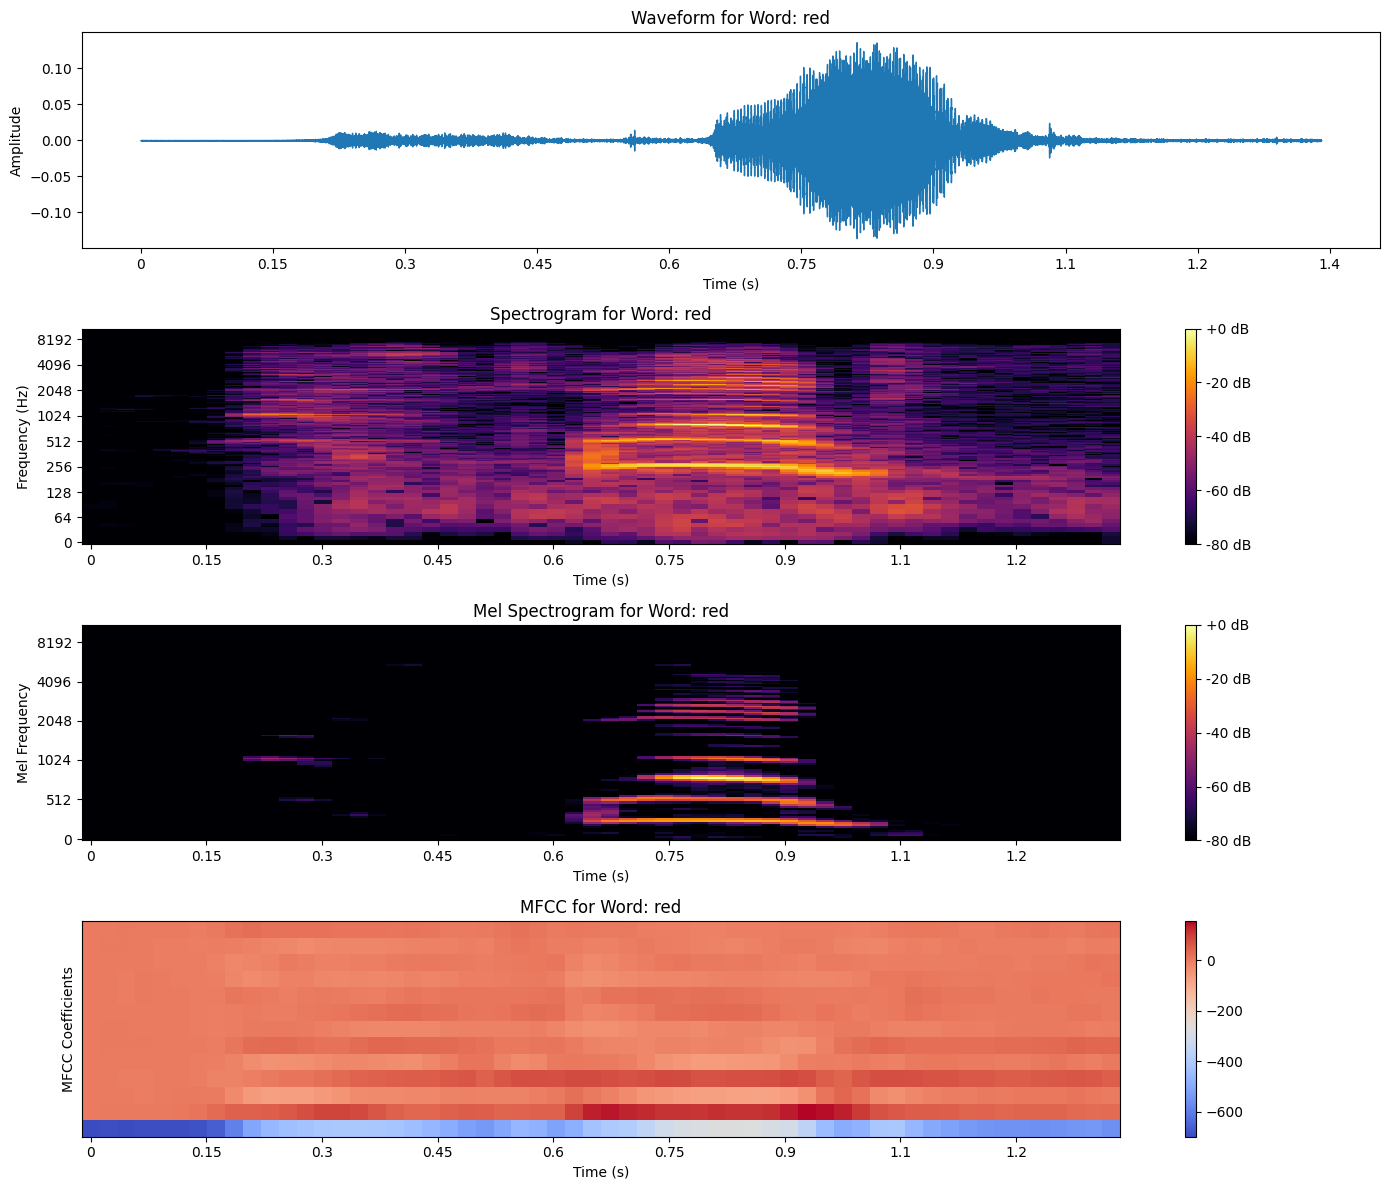

Playing Audio for Word: sun


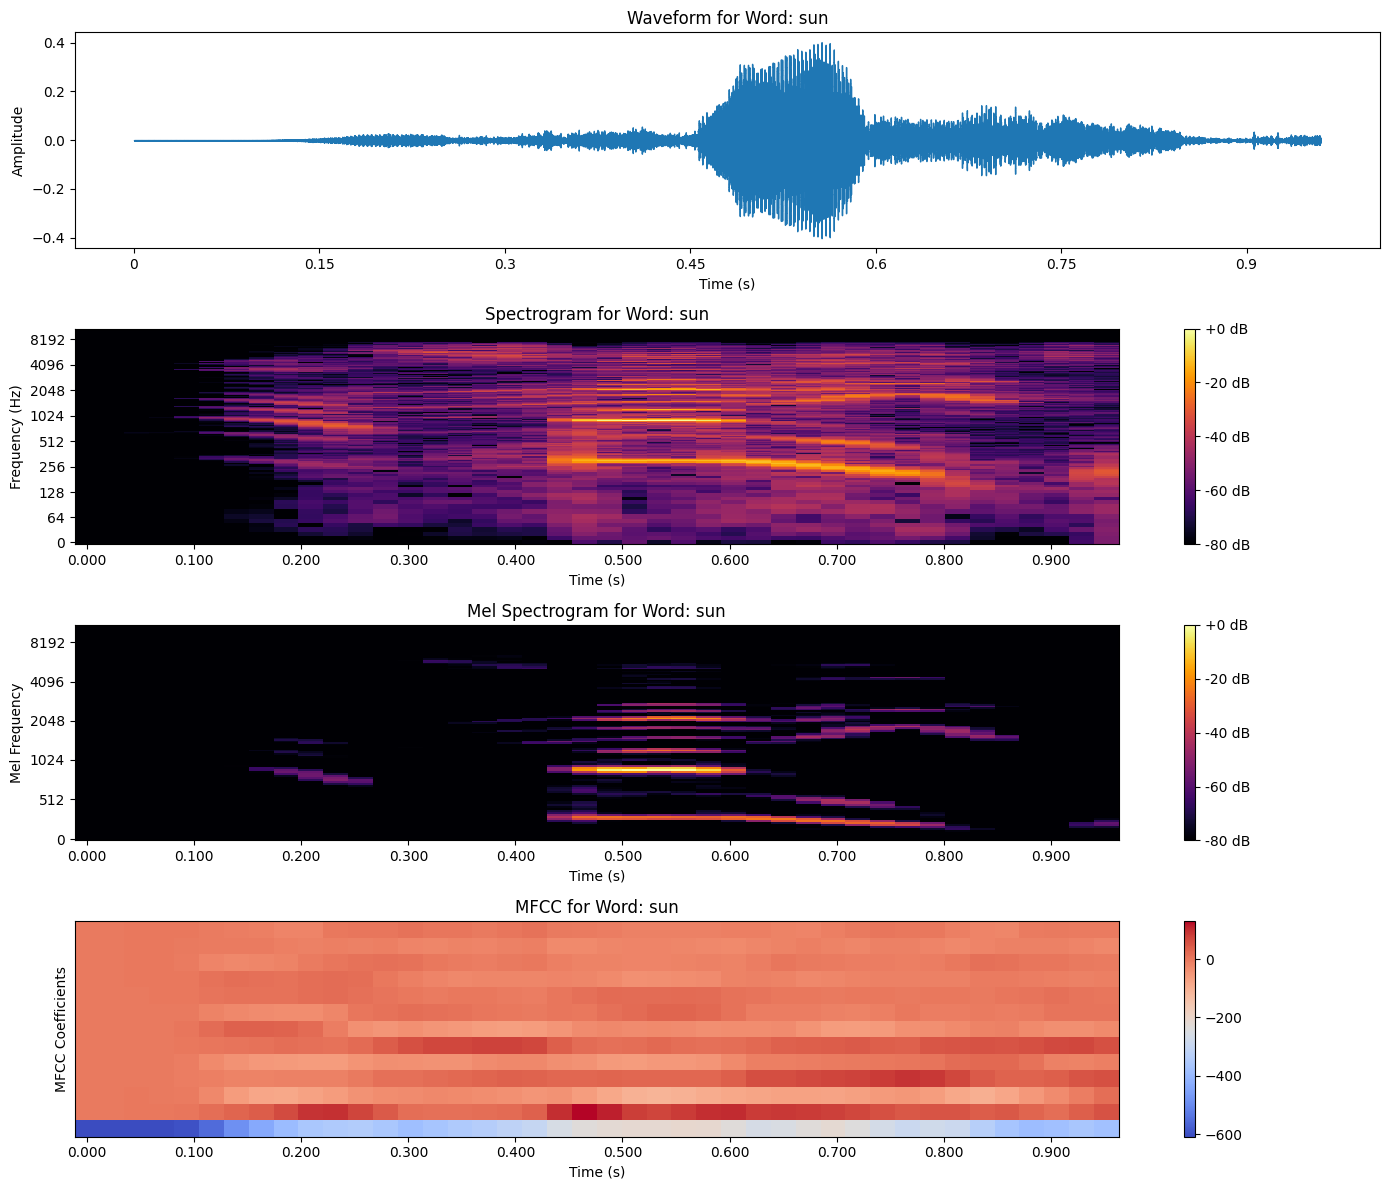

Playing Audio for Word: lip


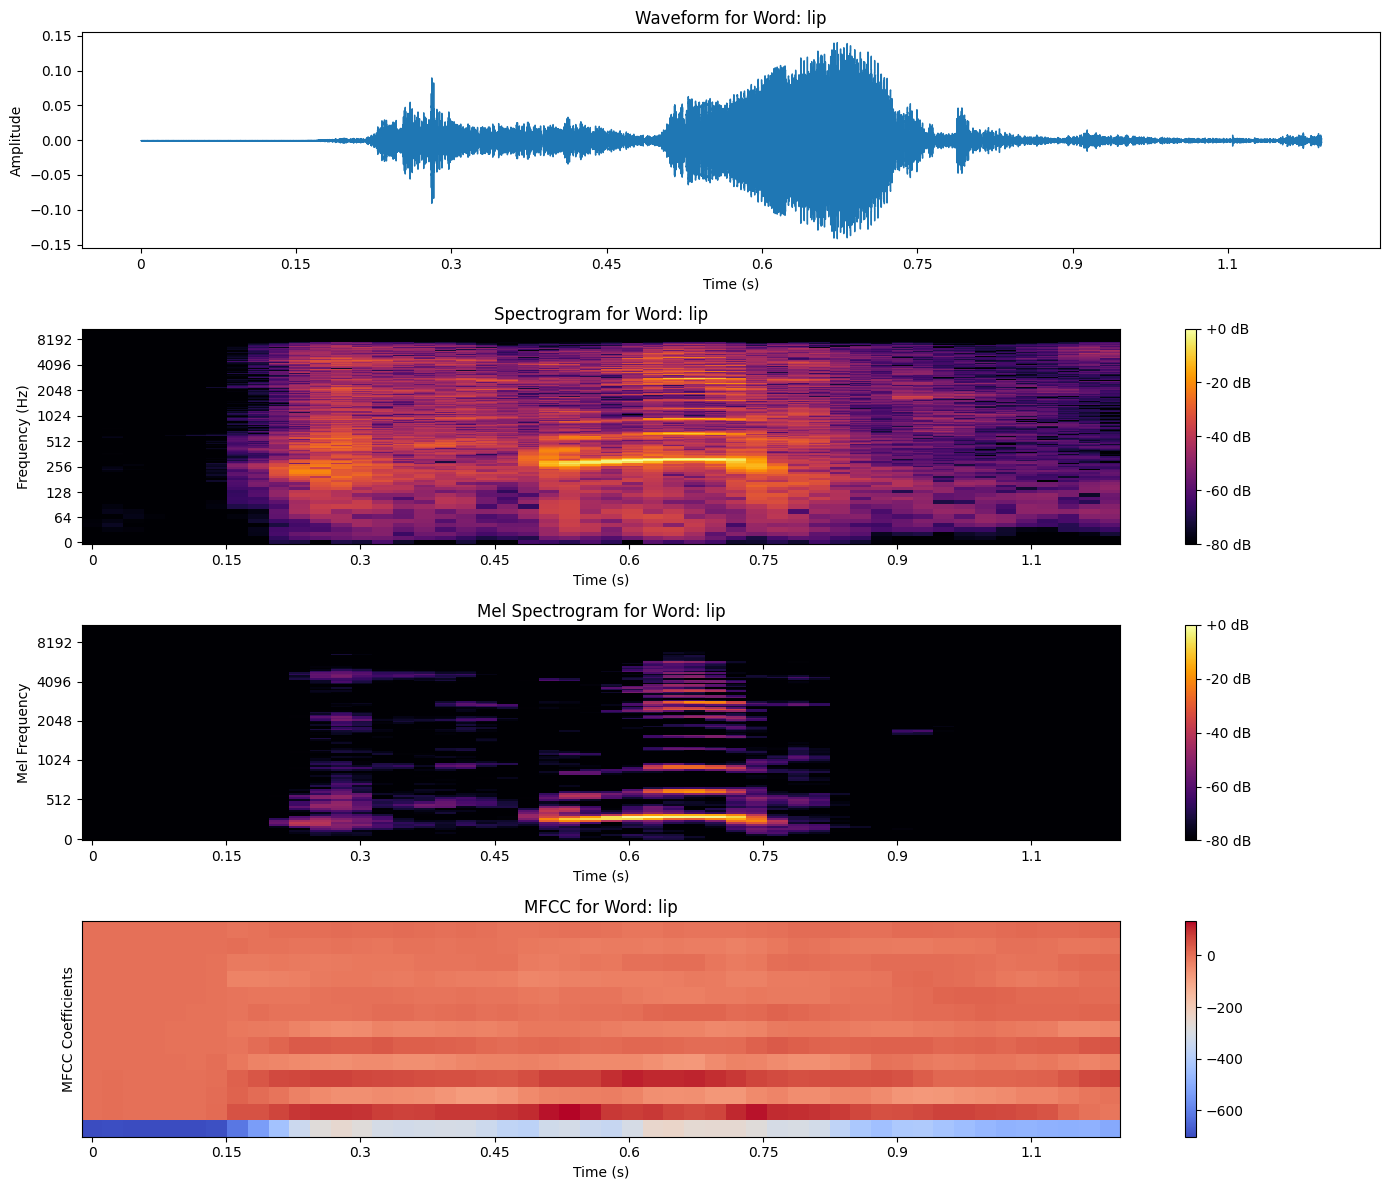

Playing Audio for Word: fan


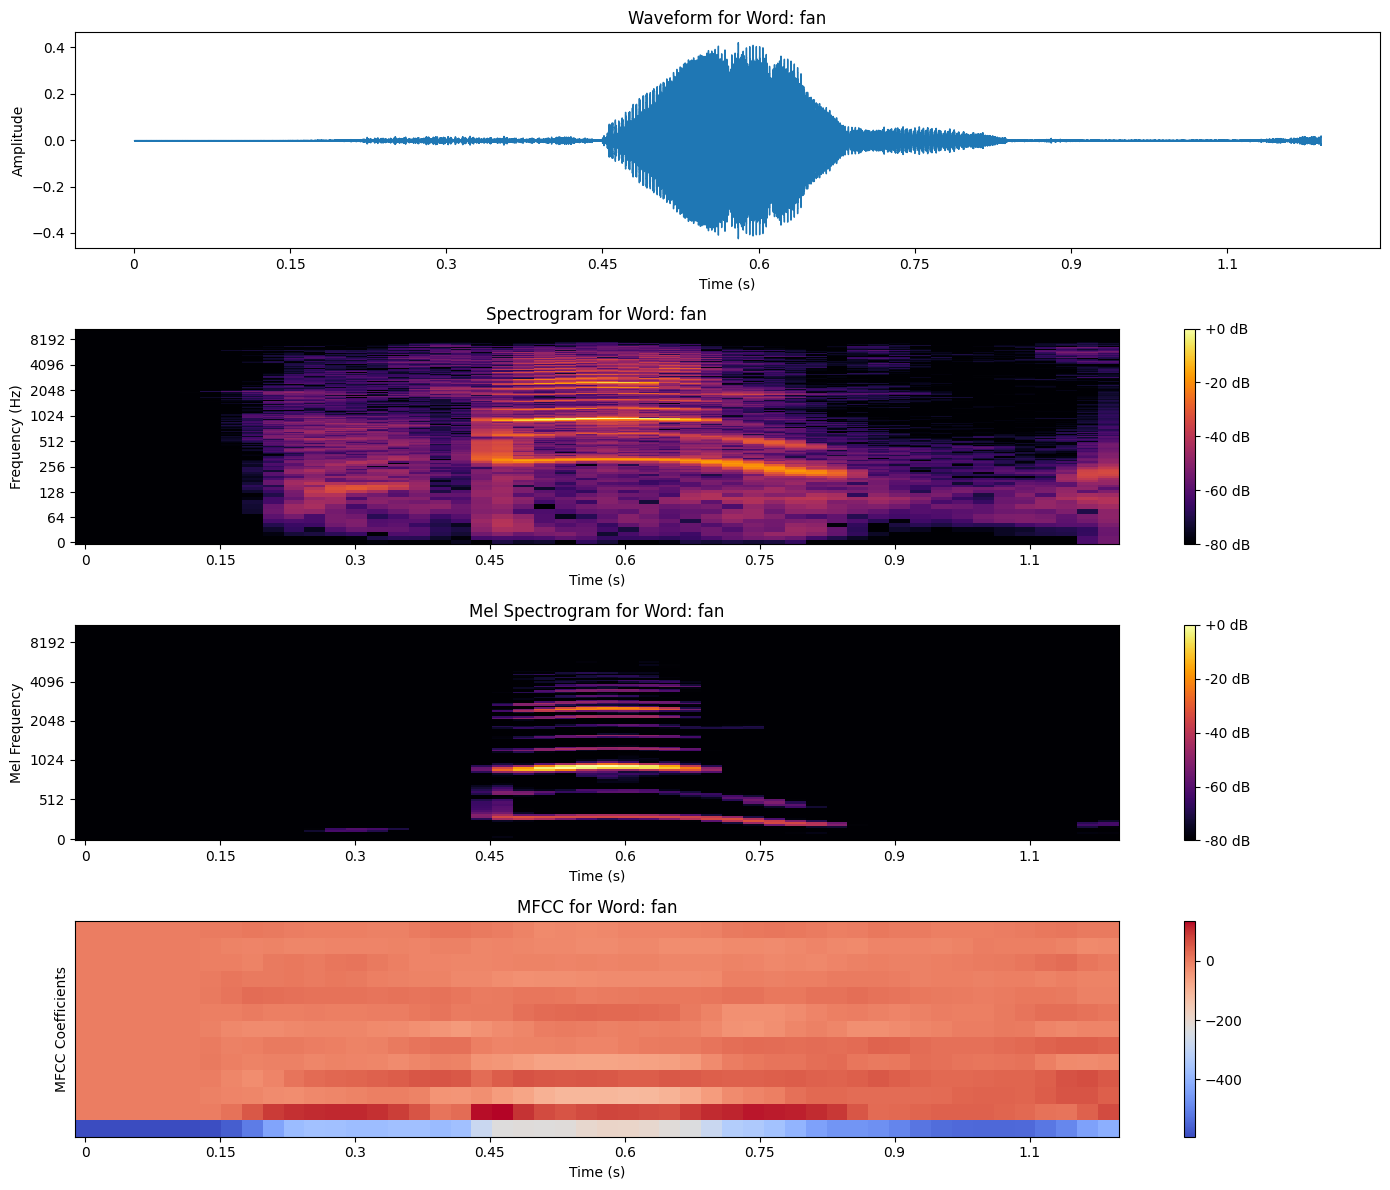

Playing Audio for Word: rat


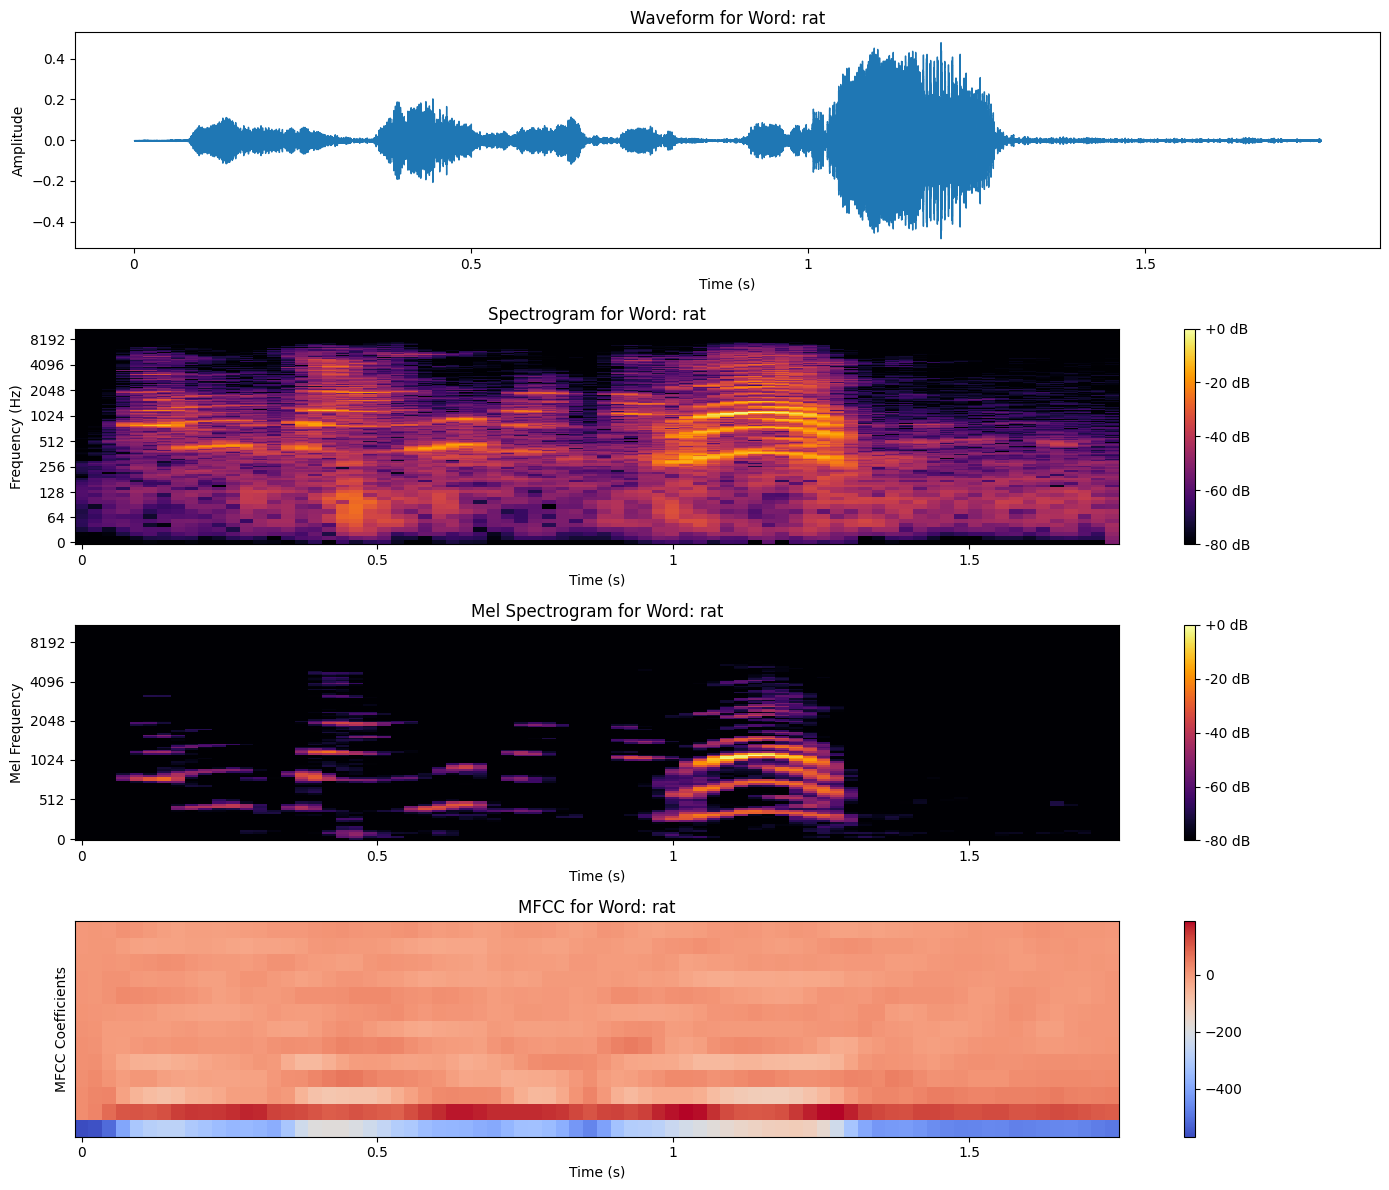

Playing Audio for Word: hot


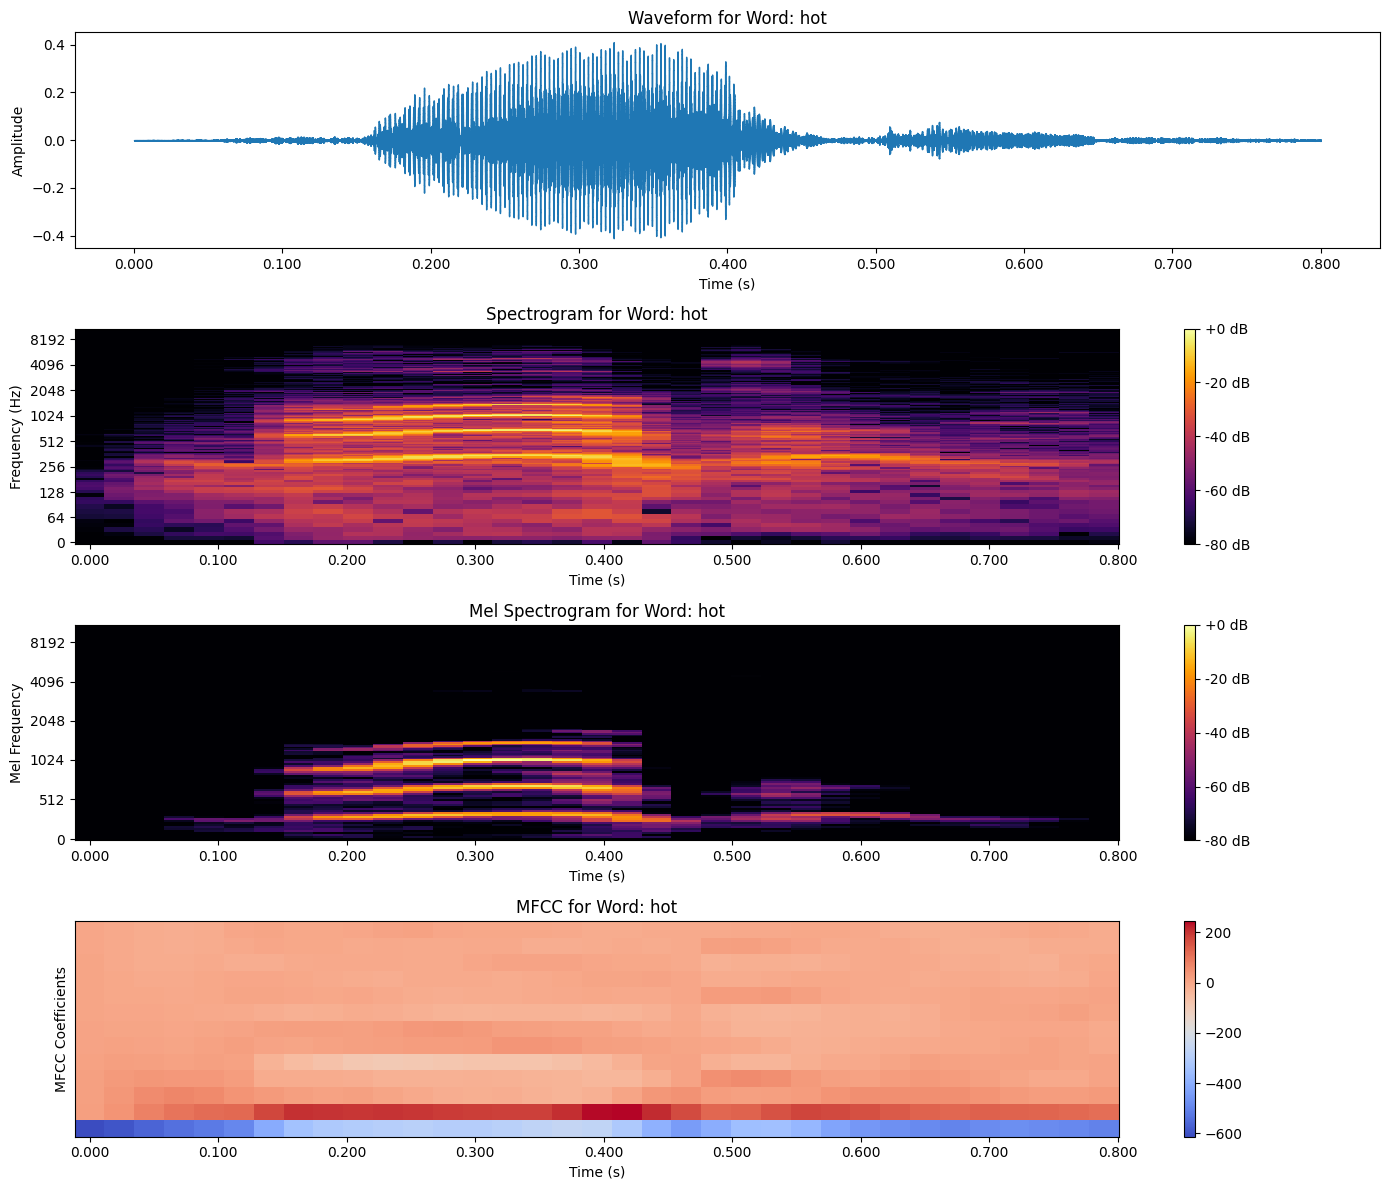

Playing Audio for Word: big


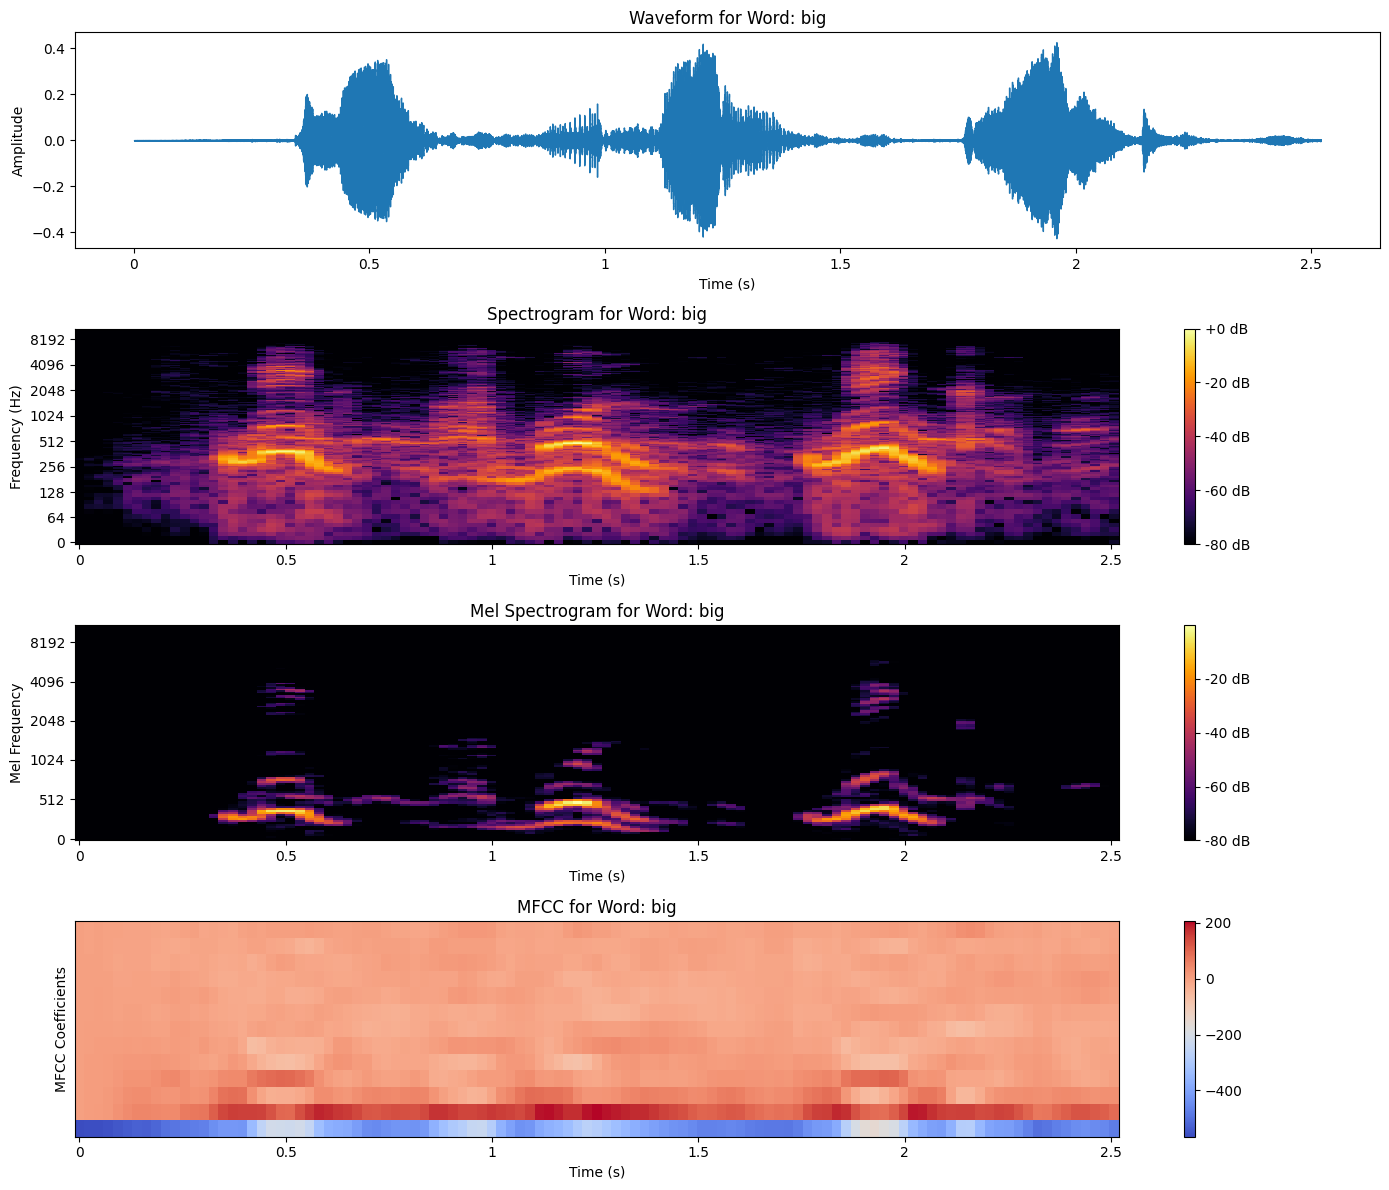

Playing Audio for Word: cow


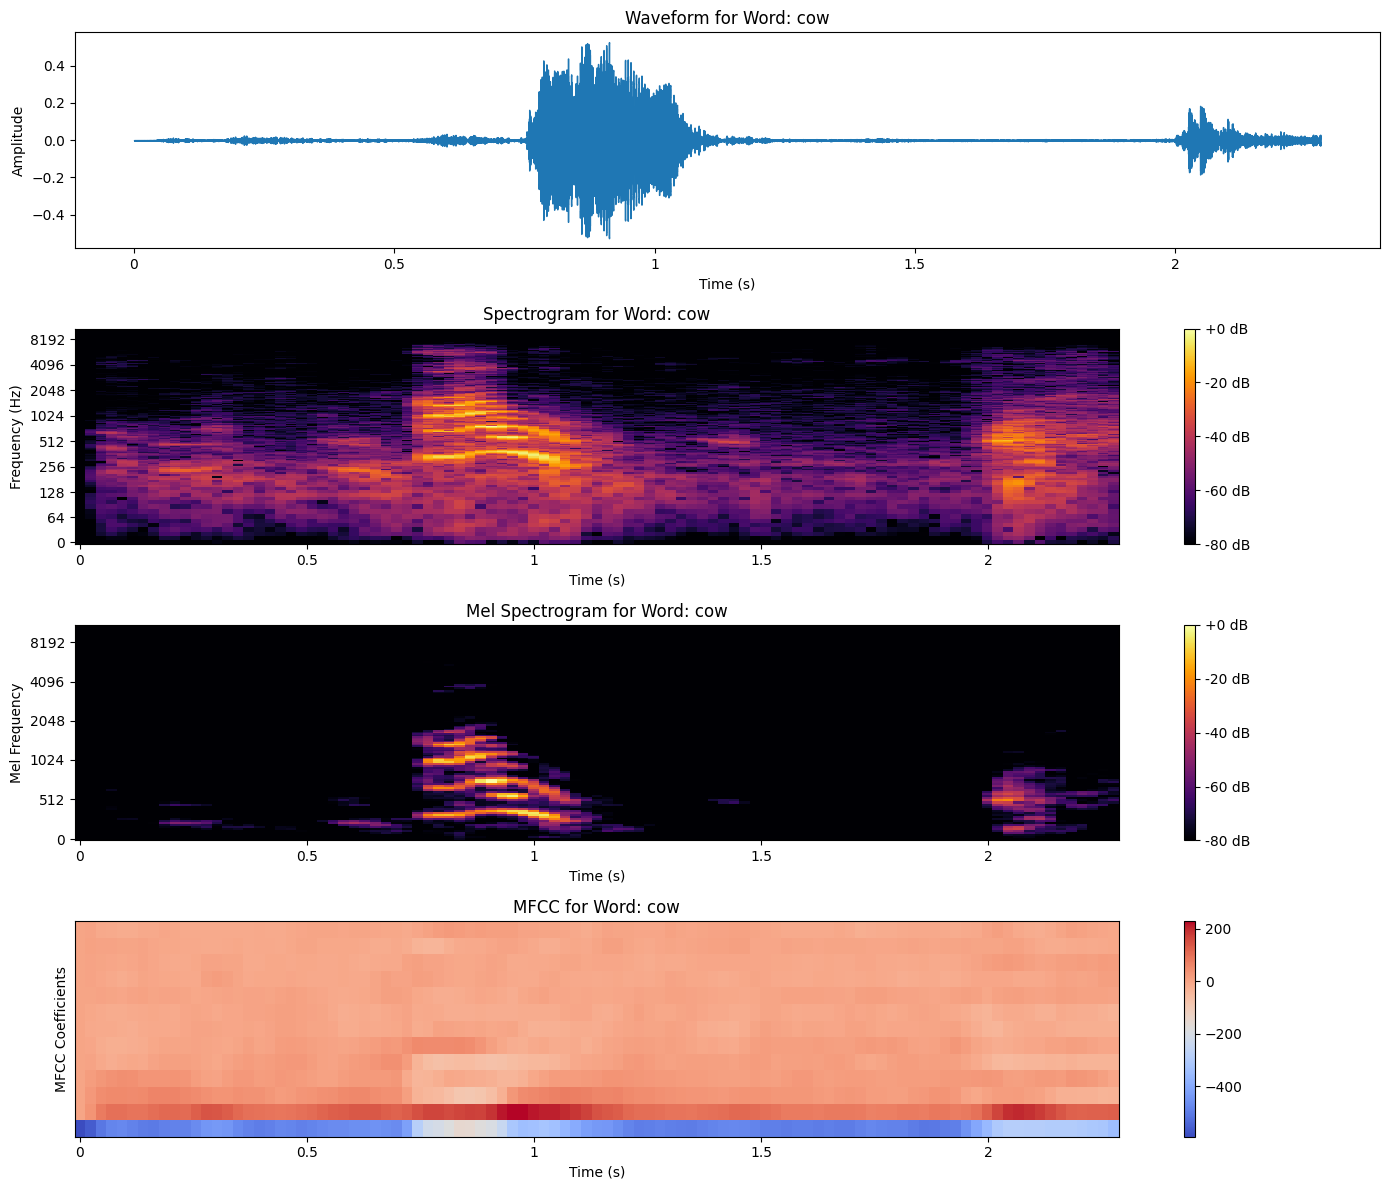

Playing Audio for Word: man


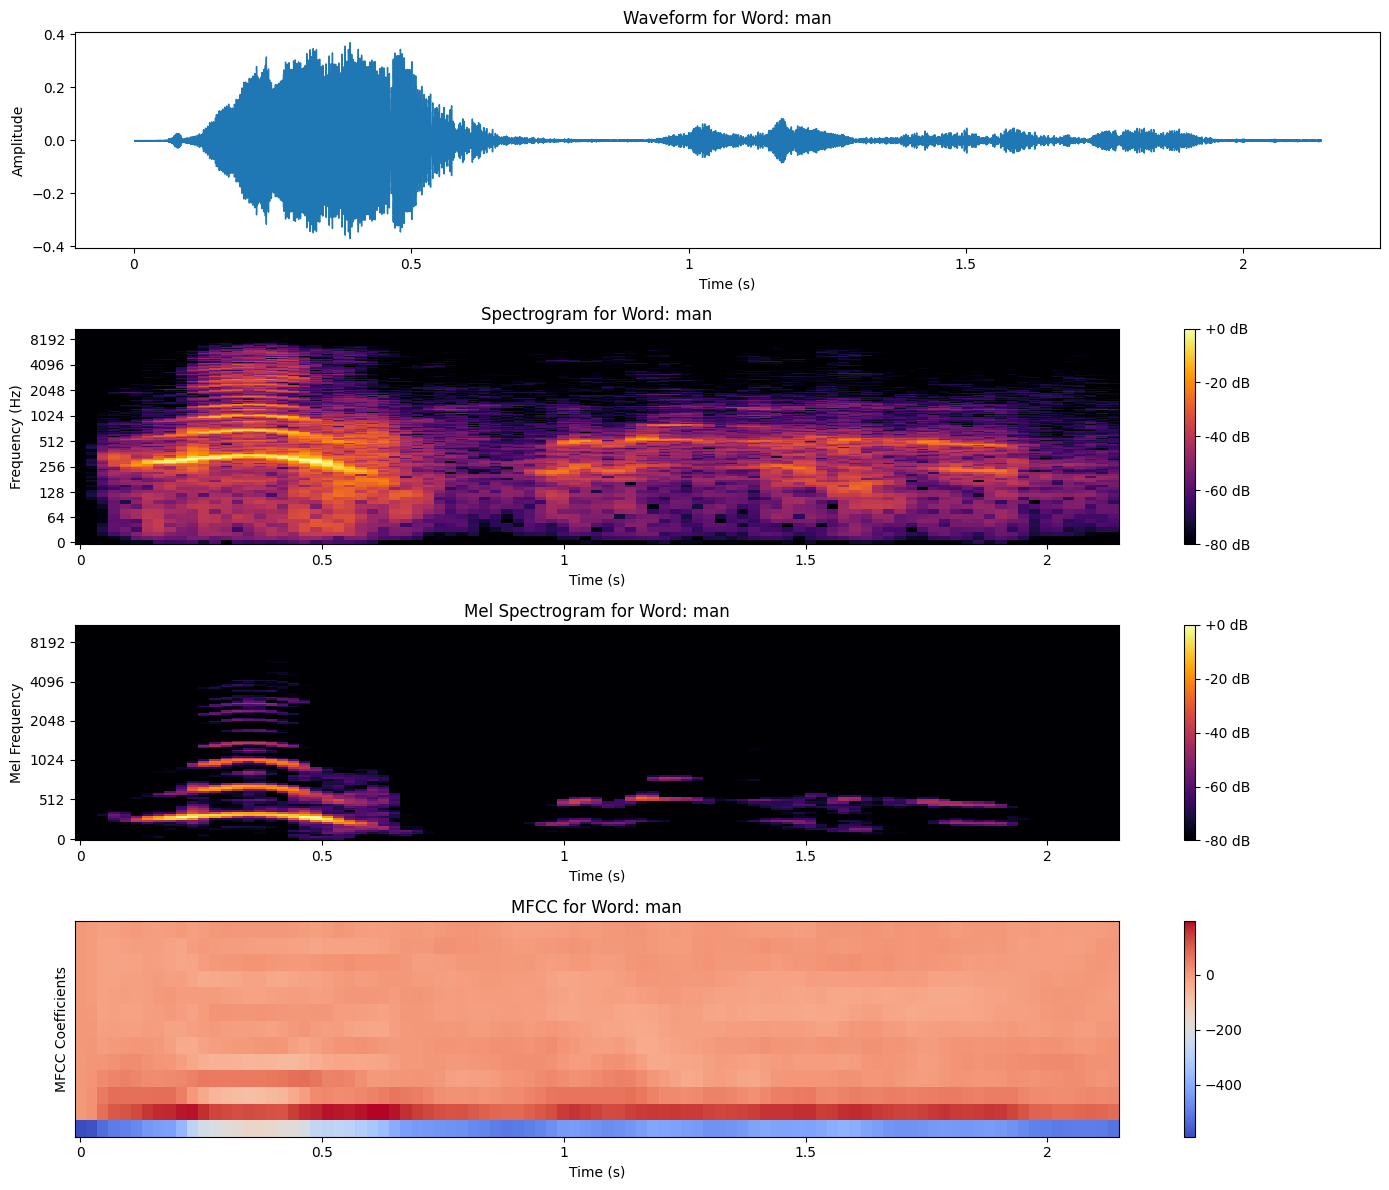

Playing Audio for Word: new


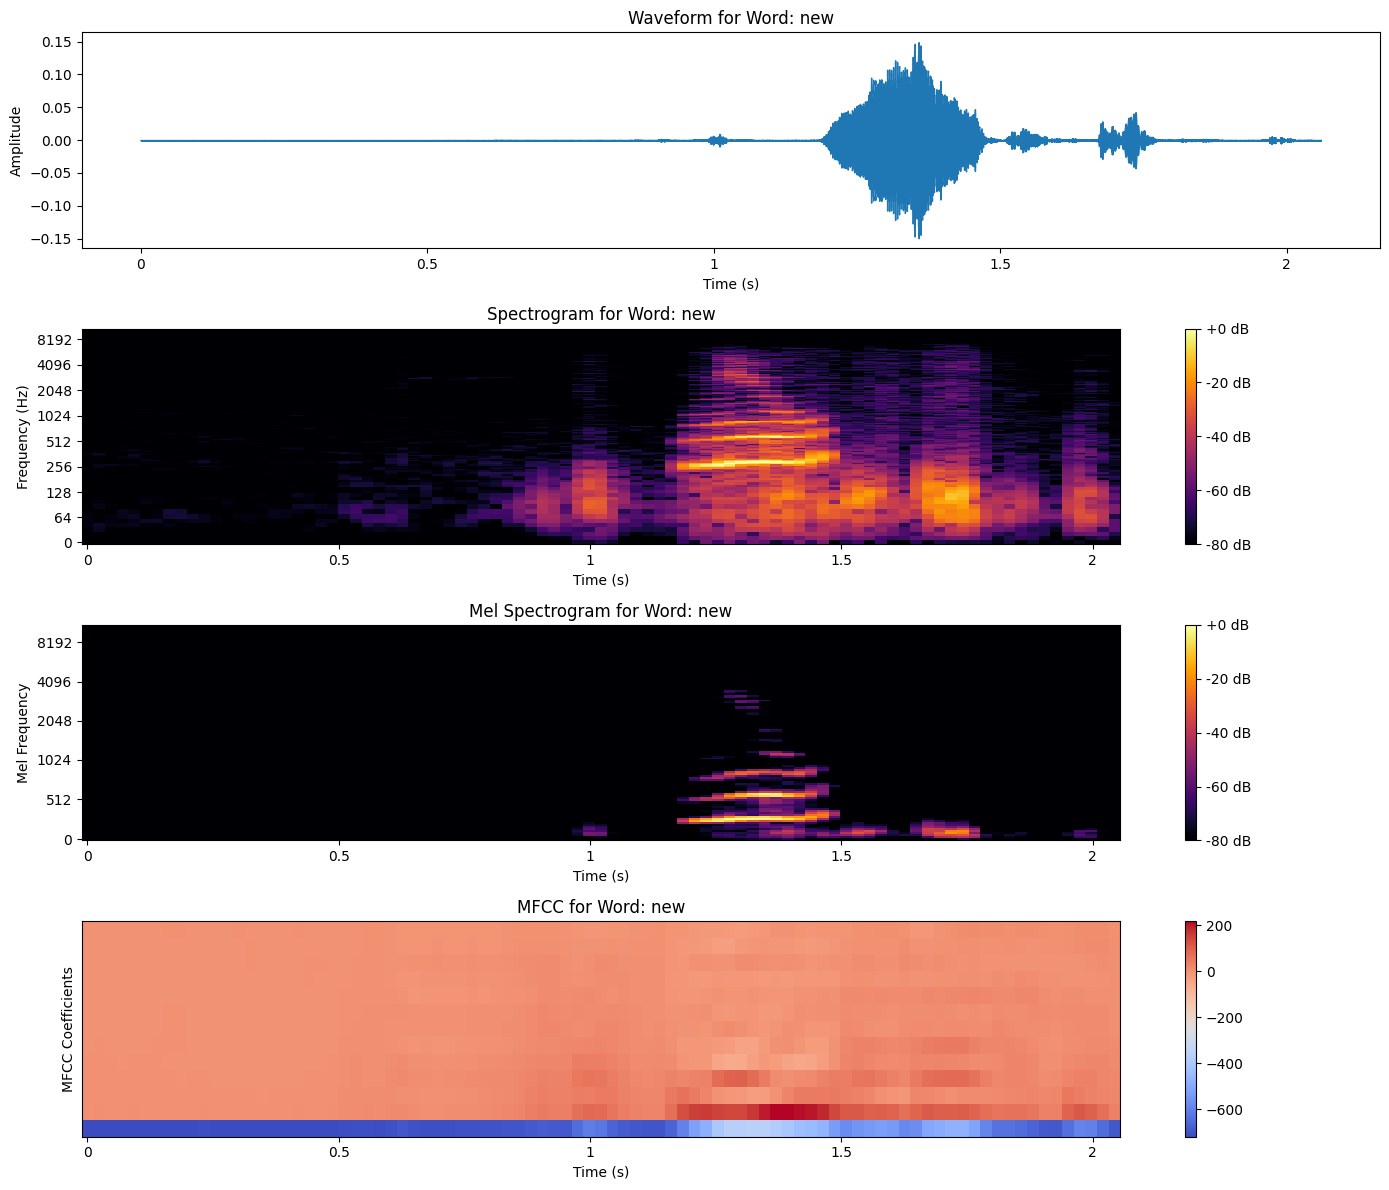

Playing Audio for Word: hat


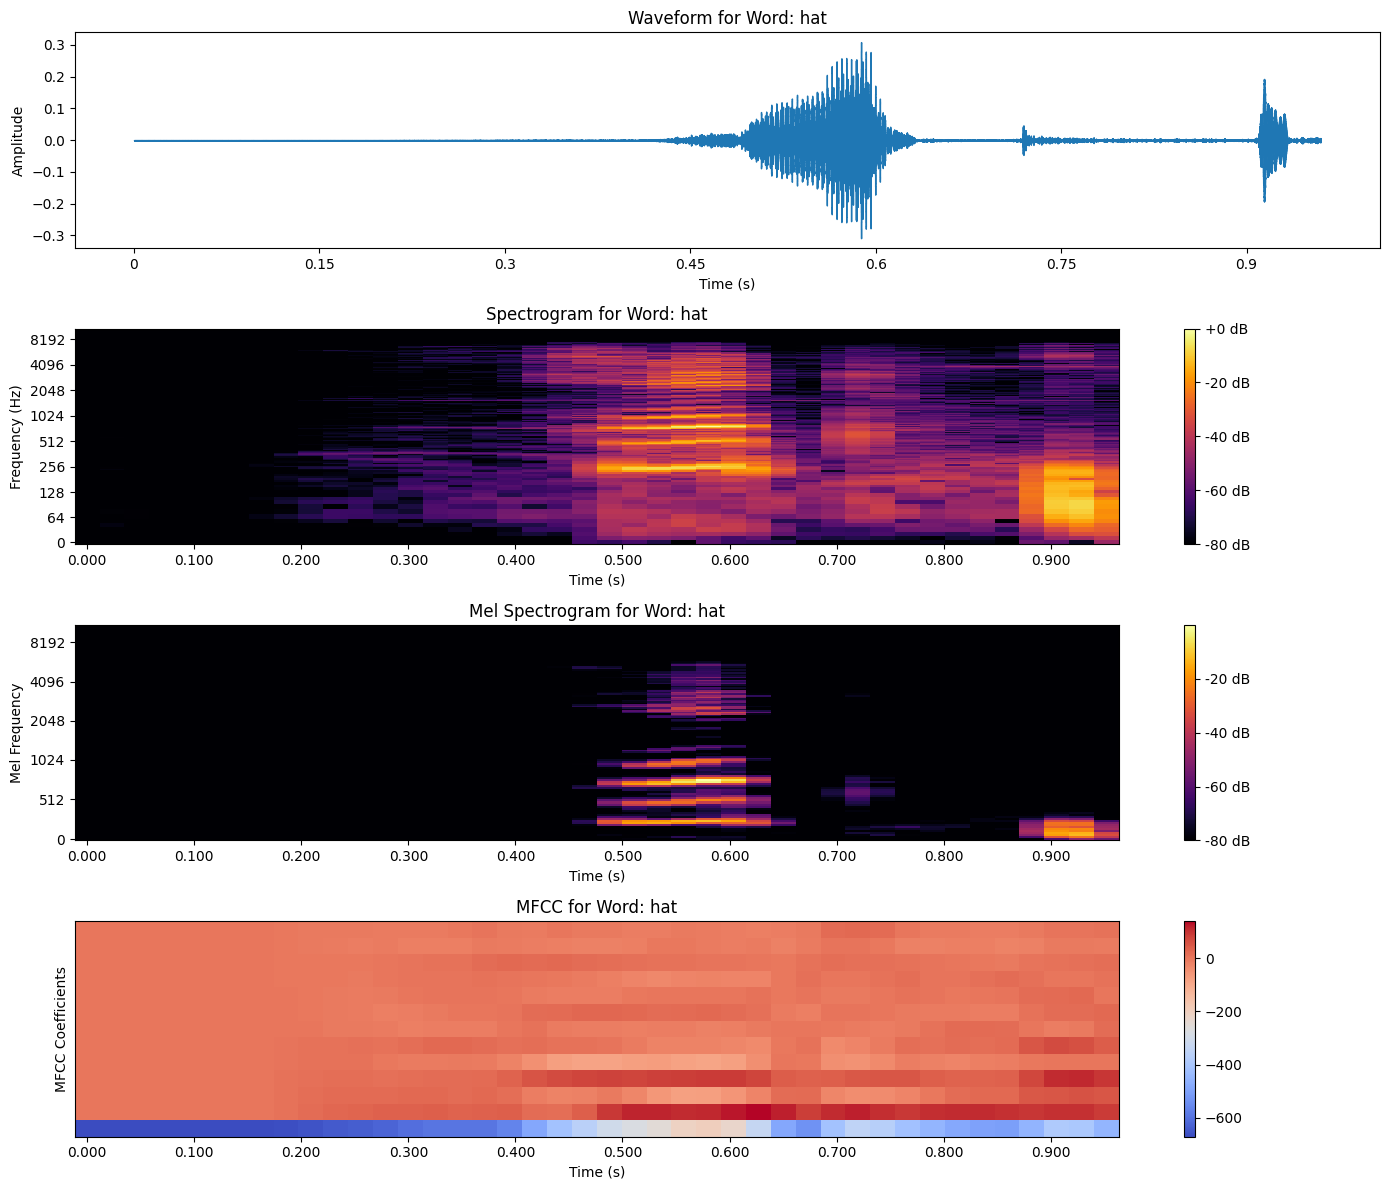

Playing Audio for Word: wet


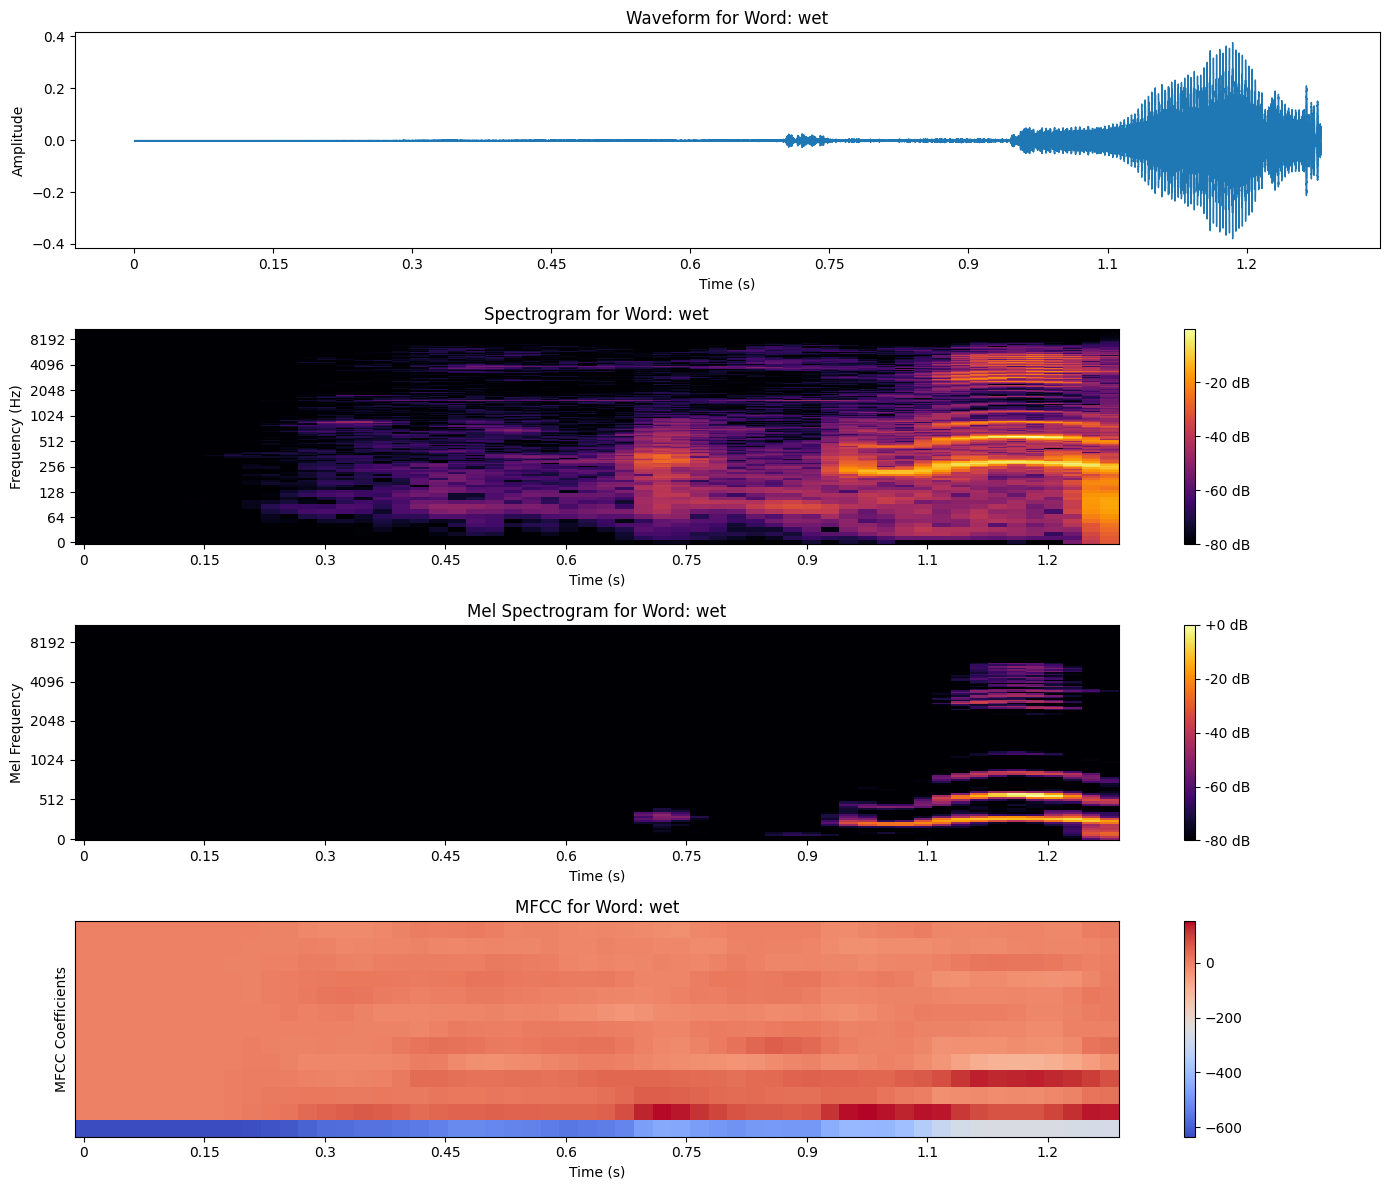

Playing Audio for Word: pen


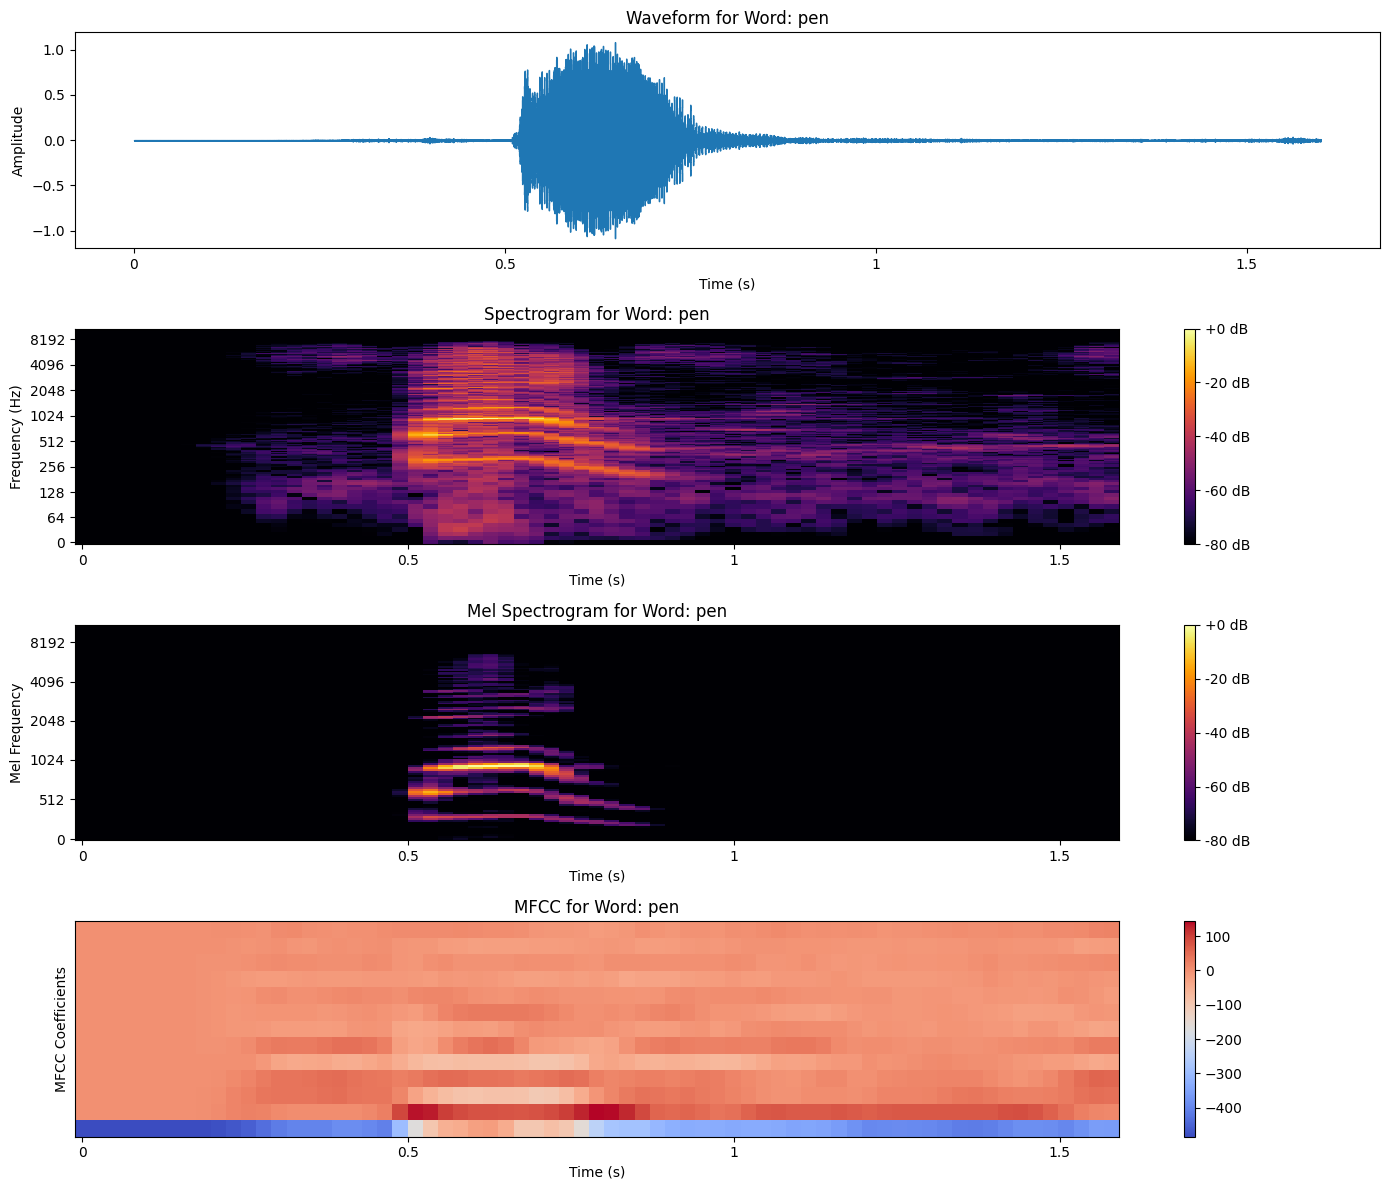

Playing Audio for Word: dog


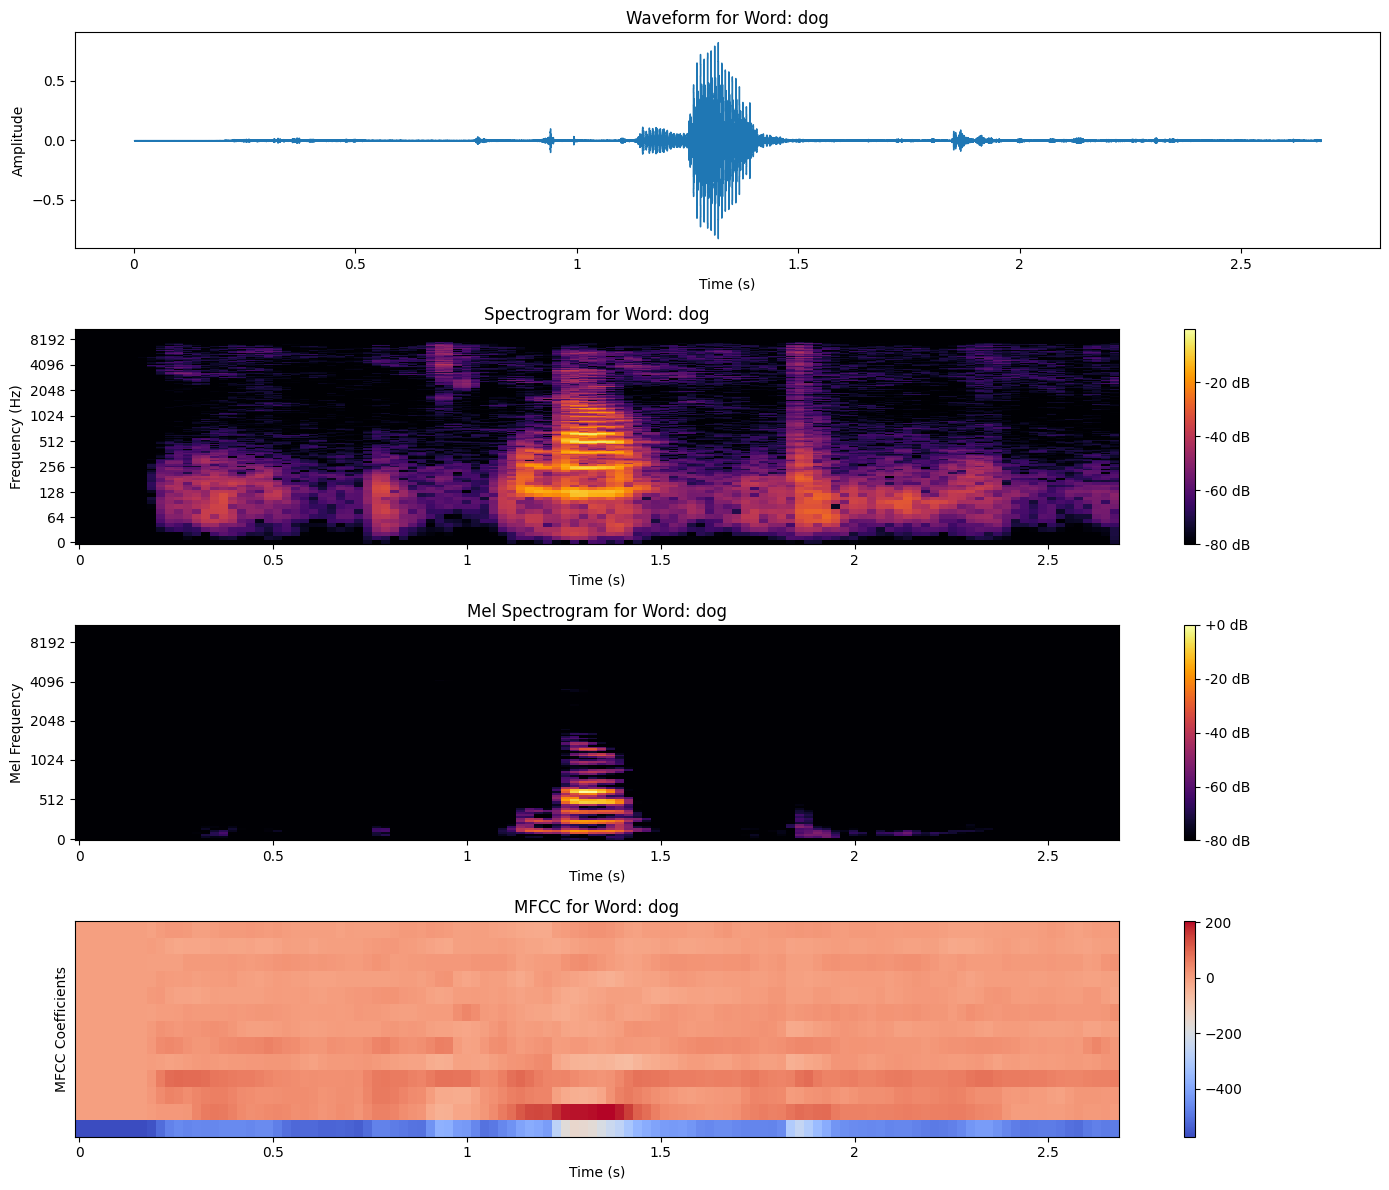

Playing Audio for Word: boy


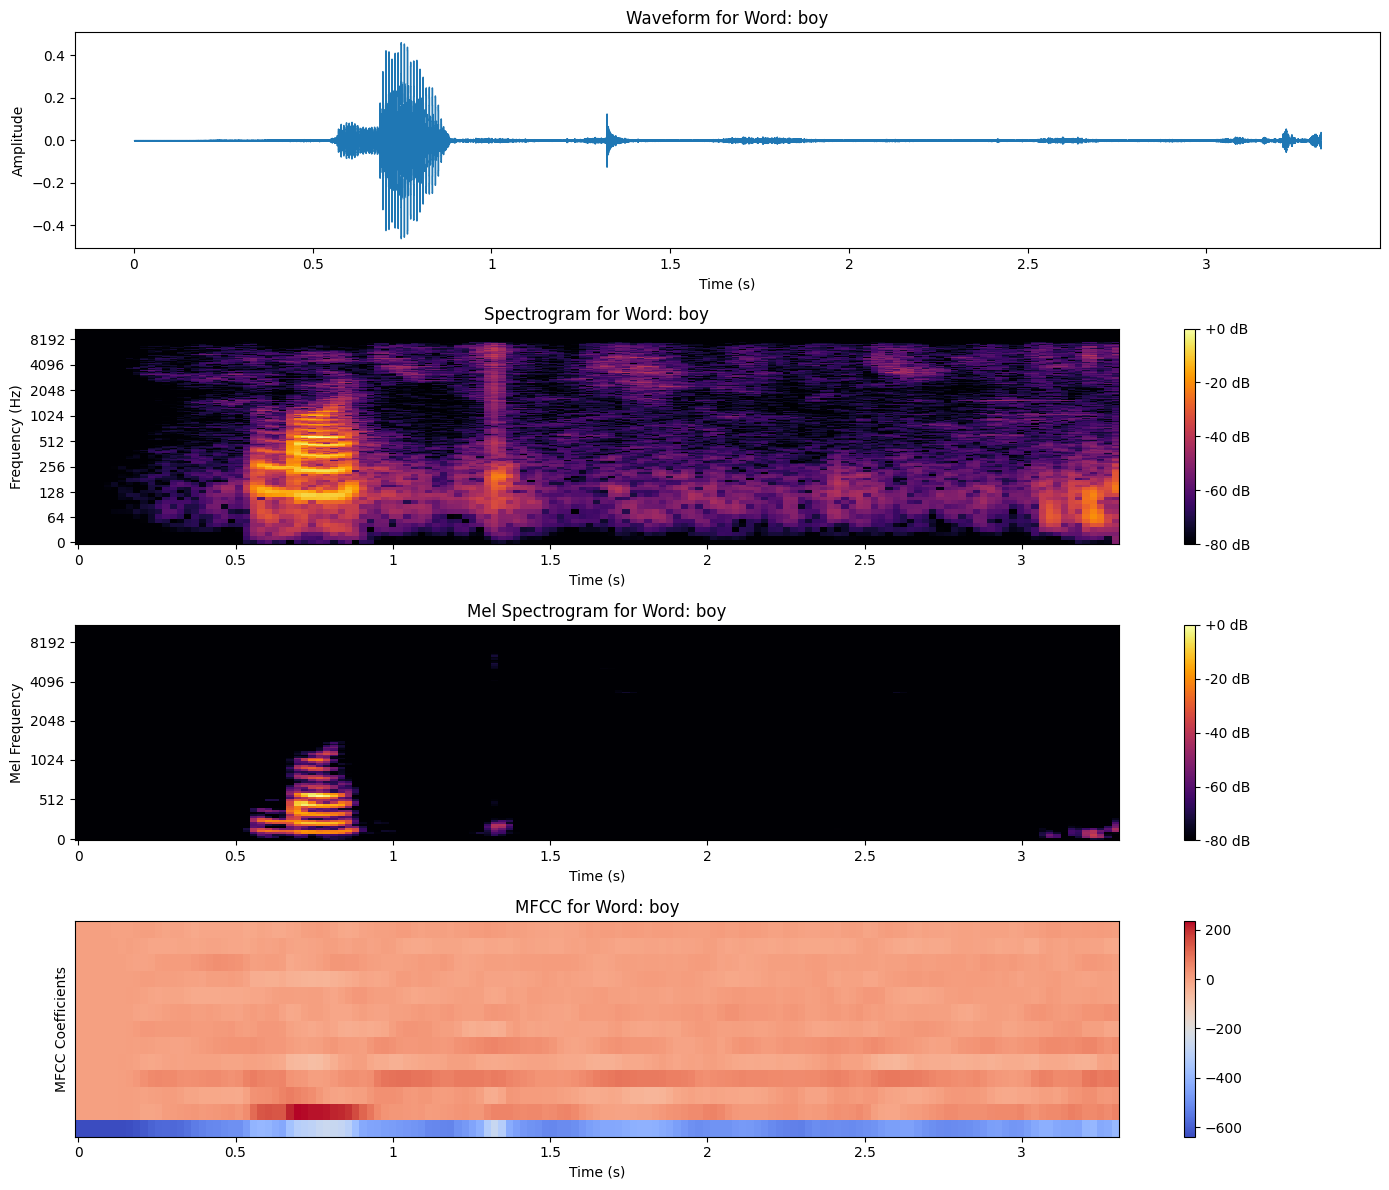

Playing Audio for Word: box


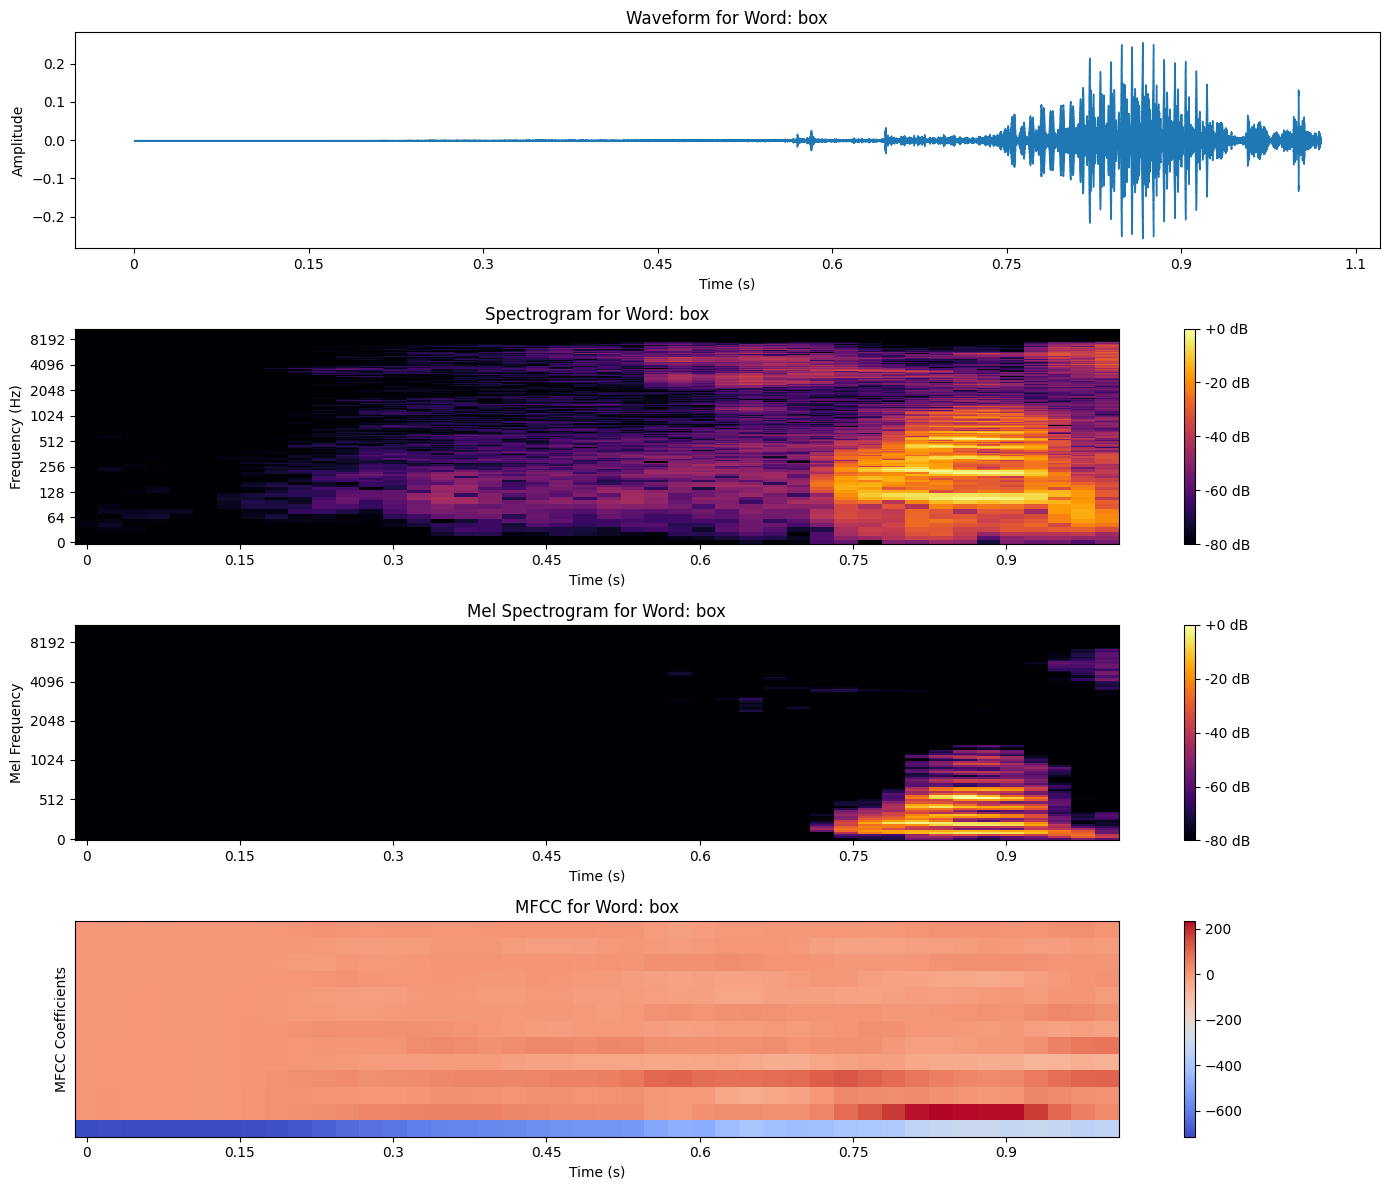

Playing Audio for Word: cup


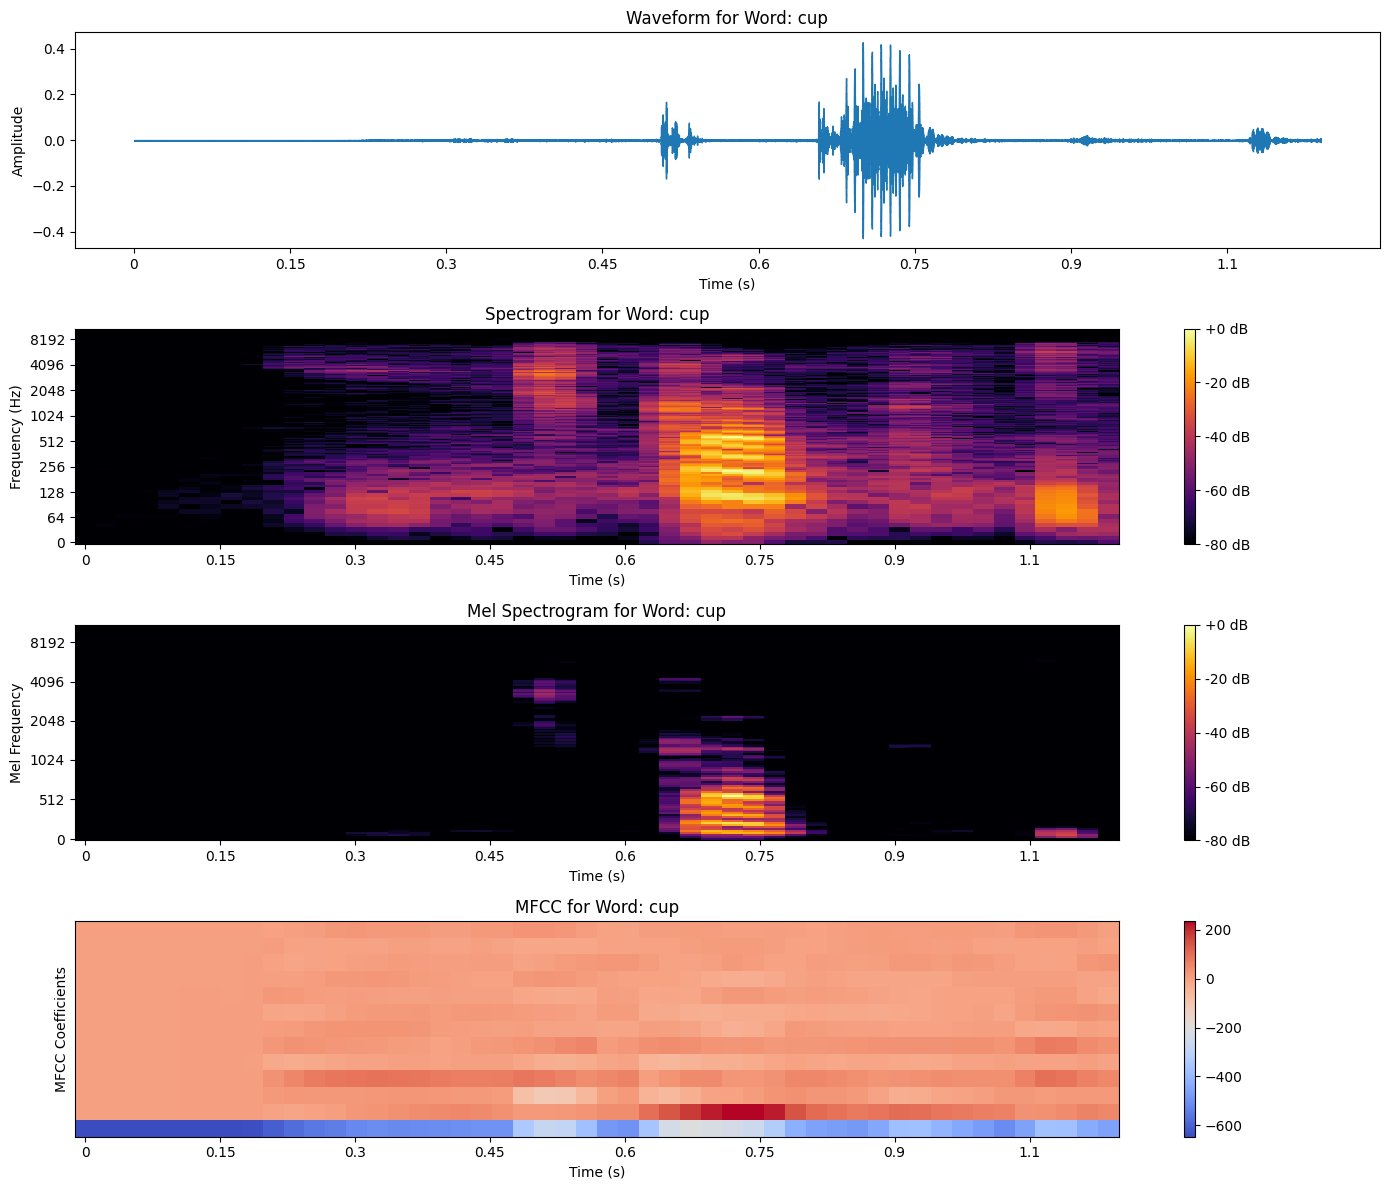

Playing Audio for Word: fat


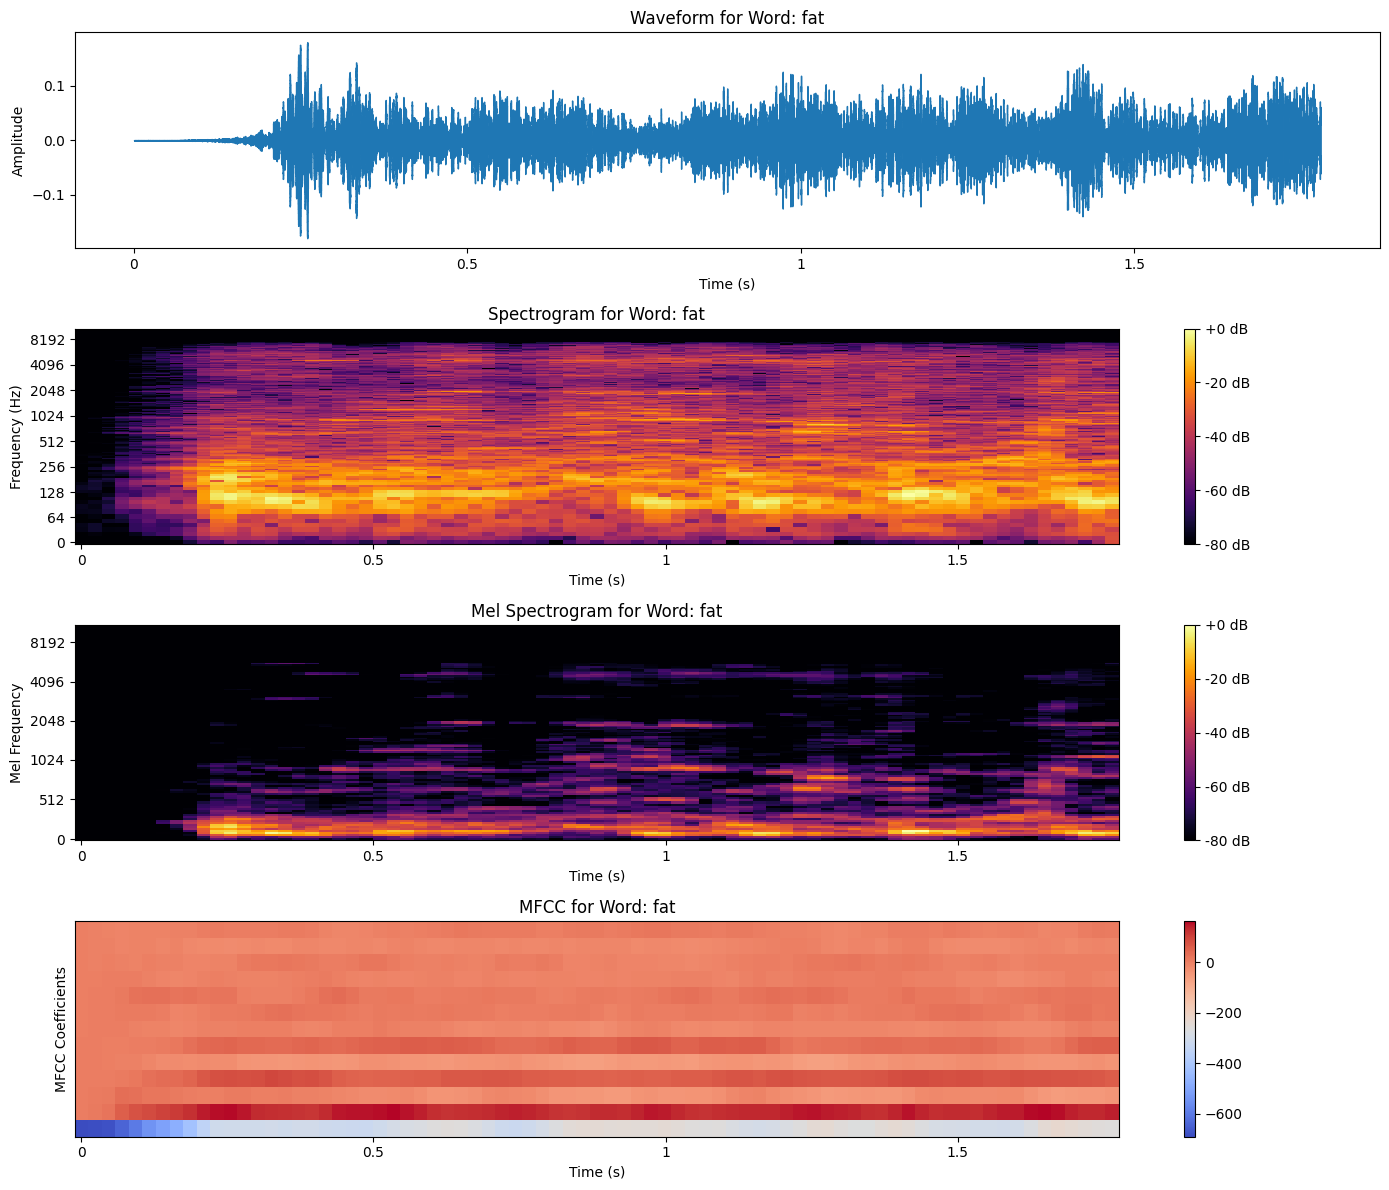

Playing Audio for Word: out


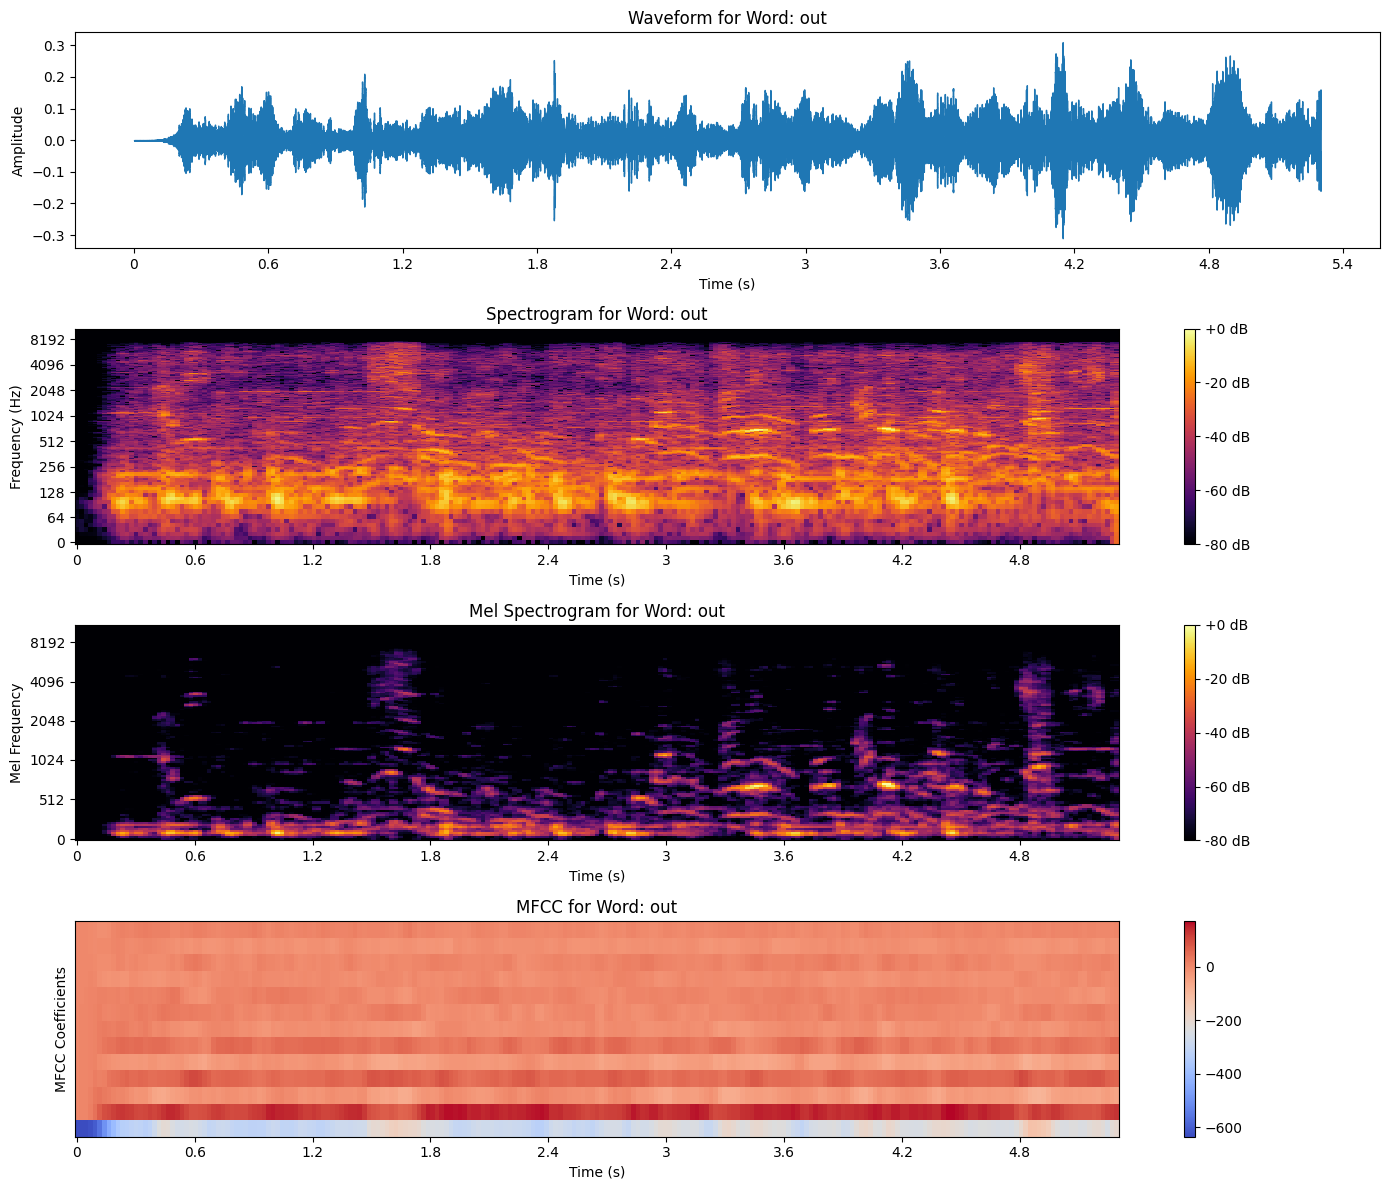

Playing Audio for Word: day


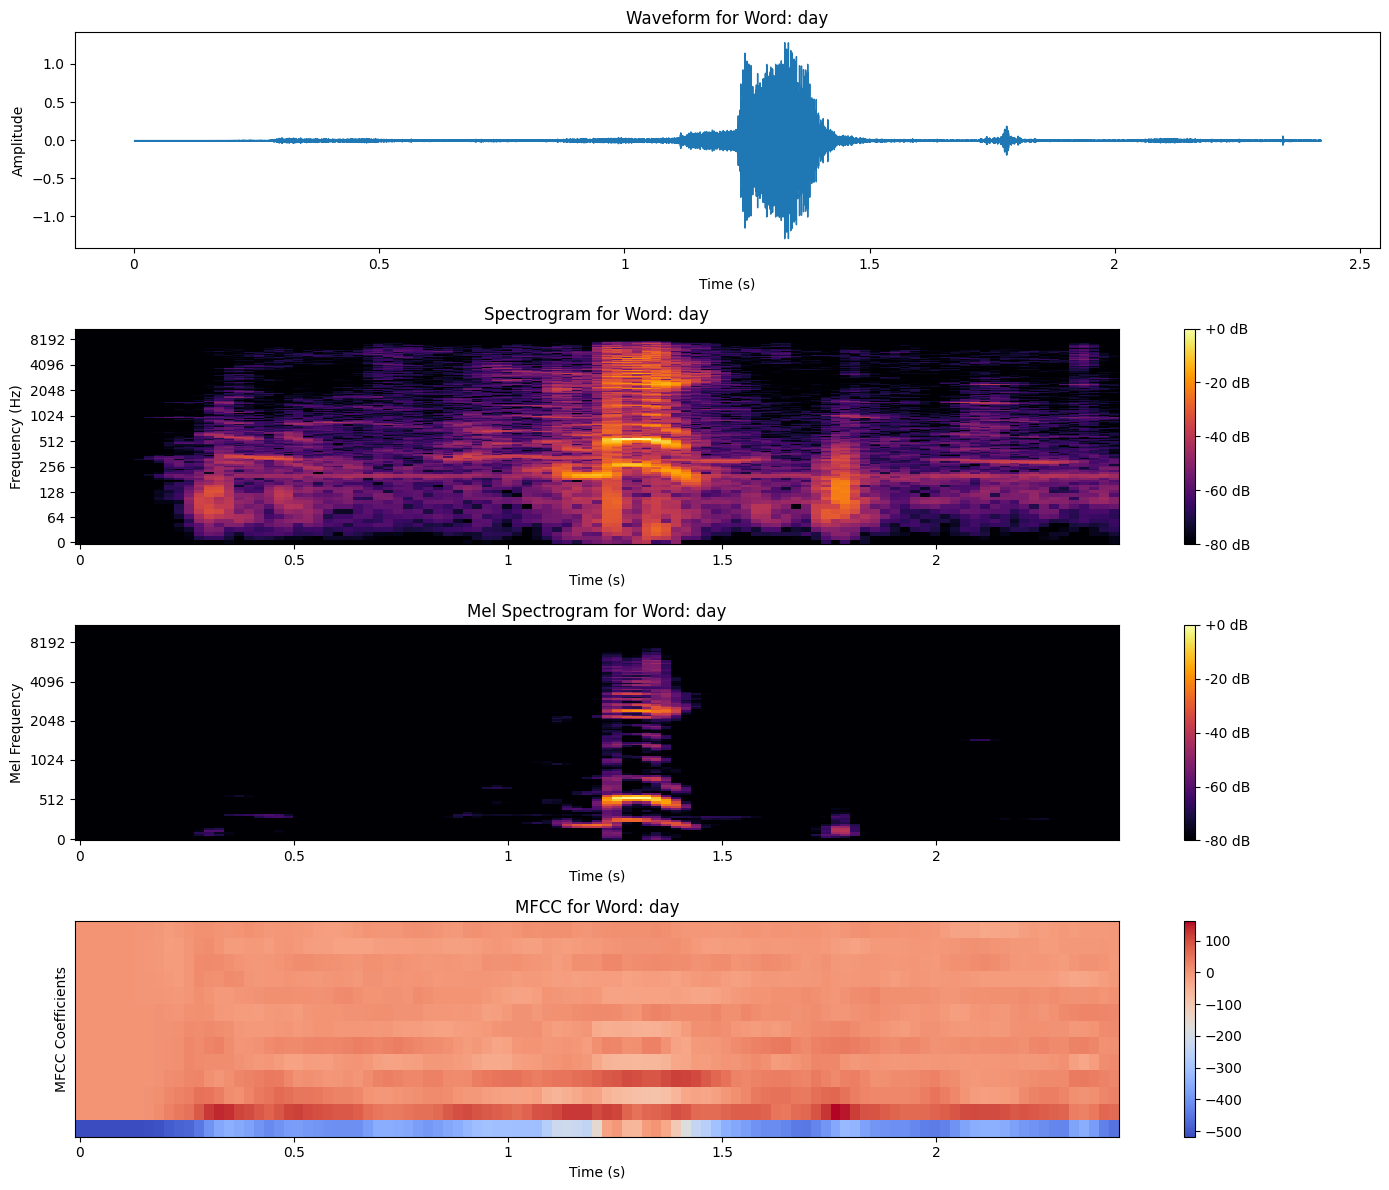

In [32]:
# Folder where the wav files are stored
wav_folder = './wav_files/'

# Get all unique words from the dataset
unique_words = df['Word'].unique()

# Function to generate the corresponding wav file path from the mp3 path
def get_wav_file_path(mp3_file_path):
    wav_file_path = mp3_file_path.replace('.mp3', '.wav')  # Replace mp3 with wav
    wav_file_path = os.path.join(wav_folder, os.path.relpath(wav_file_path))  # Add wav folder path
    return wav_file_path

# Function to plot Waveform, Spectrogram, Mel Spectrogram, and MFCC for an audio file
def plot_audio_features(audio_file, word):
    # Load the audio file
    y, sr = librosa.load(audio_file)
    
    # Display the IPython audio player
    print(f"Playing Audio for Word: {word}")
    display(ipd.Audio(data=y, rate=sr))

    plt.figure(figsize=(14, 12))

    # Plot the waveform
    plt.subplot(4, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform for Word: {word}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Plot the Spectrogram
    plt.subplot(4, 1, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='inferno')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram for Word: {word}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    # Plot the Mel Spectrogram
    plt.subplot(4, 1, 3)
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_spect_db = librosa.amplitude_to_db(mel_spect, ref=np.max)
    librosa.display.specshow(mel_spect_db, sr=sr, x_axis='time', y_axis='mel', cmap='inferno')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel Spectrogram for Word: {word}')
    plt.xlabel('Time (s)')
    plt.ylabel('Mel Frequency')

    # Calculate and plot MFCCs
    plt.subplot(4, 1, 4)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCC for Word: {word}')
    plt.xlabel('Time (s)')
    plt.ylabel('MFCC Coefficients')

    # Adjust layout for better display
    plt.tight_layout()
    plt.show()

# Loop through each unique word and plot the audio features for its associated wav file
for word in unique_words:
    # Get the first mp3 file path for the word from the dataset
    mp3_file = df[df['Word'] == word]['Audio File'].values[0]  # Original mp3 path
    wav_file = get_wav_file_path(mp3_file)  # Get the corresponding wav file path

    if os.path.exists(wav_file):  # Check if the wav file exists
        plot_audio_features(wav_file, word)  # Plot the features
    else:
        print(f"Audio file not found: {wav_file}")


Word
man    238
red    238
day    238
wet    238
hat    238
new    238
box    238
pen    238
fox    238
hen    238
hot    238
sit    238
cup    238
boy    238
fat    238
run    238
dog    238
old    238
rat    238
lip    238
big    238
cow    238
fan    238
cat    238
sun    238
out    238
Name: count, dtype: int64


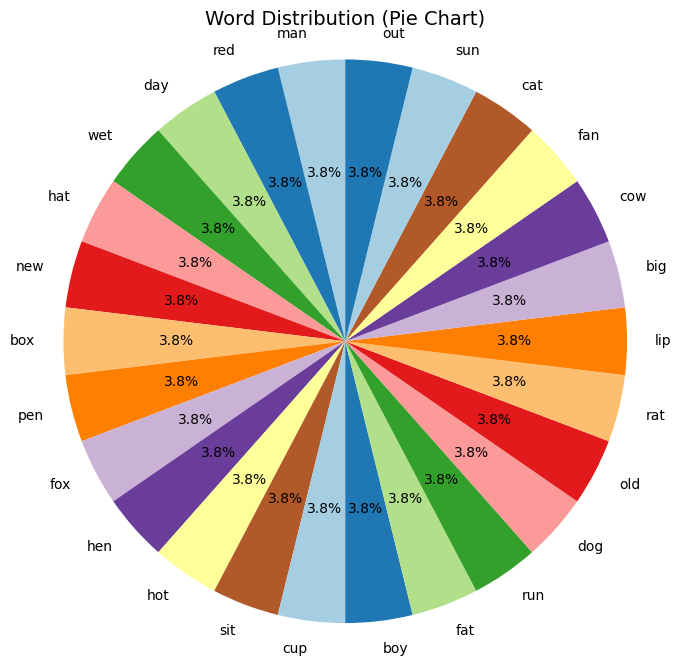

In [33]:
from sklearn.utils import resample

# Group by 'Word' to get the count for each word
word_counts = df['Word'].value_counts().reset_index()
word_counts.columns = ['Word', 'Count']

# Set a target number of samples (e.g., median or mean count)
target_samples = int(np.median(word_counts['Count']))

# Function to balance the classes based on the word counts
def balance_classes(df, word_counts, target_samples):
    balanced_data = []

    # Loop through each word and its count
    for _, row in word_counts.iterrows():
        word = row['Word']
        count = row['Count']

        # Get the subset of the DataFrame for this word
        word_df = df[df['Word'] == word]

        if count > target_samples:
            # Undersample if class has more samples than the target
            word_df_resampled = word_df.sample(n=target_samples, random_state=42)
        elif count < target_samples:
            # Oversample if class has fewer samples than the target
            word_df_resampled = resample(word_df, replace=True, n_samples=target_samples, random_state=42)
        else:
            # Keep the class unchanged if it has exactly target_samples
            word_df_resampled = word_df

        # Append the resampled DataFrame to the balanced dataset
        balanced_data.append(word_df_resampled)

    # Concatenate all the resampled DataFrames
    balanced_df = pd.concat(balanced_data, axis=0)

    return balanced_df

# Balance the classes
balanced_df = balance_classes(df, word_counts, target_samples)

# Check the result
print(balanced_df['Word'].value_counts())

# Save the balanced dataset to a new CSV file
balanced_df.to_csv('balanced_dataset.csv', index=False)

# Function to create and display a pie chart for 'Word'
def plot_pie(column_name, title):
    counts = balanced_df[column_name].value_counts()  # Get value counts
    plt.figure(figsize=(8, 8))
    
    # Plotting pie chart
    plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    
    # Equal aspect ratio ensures the pie is drawn as a circle
    plt.title(f'{title} Distribution (Pie Chart)', fontsize=14)
    plt.axis('equal')
    
    # Display the plot
    plt.show()

# Pie chart for 'Word'
plot_pie('Word', 'Word')